## <font color='blue'>Sommaire</font>

**[Partie 1 - Importation et Inspection des fichiers de données](#partie1)**
* [1. Importation des librairies](#1_1)
* [2. Définition des fonctions](#1_2)
* [3. Analyse exploratoire](#1_3)
* [4. Jointure](#1_4)
* [5. Traitement des valeurs nulles](#1_5)
* [5. Création variables supplémentaires](#1_6)

**[Partie 2 - Analyse univariée et Bivariée](#partie2)**
* [1. Analyse Univariée](#2_1)
* [1. Analyse Bivariée](#2_2)
* [1. Export du dataframe final](#2_3)

# <font color='blue'>Partie 1 - Importation et inspection des fichiers de données<a class="anchor" id="partie1"></a></font>

## <font>1. Importation des librairies<a class="anchor" id="1_1"></a></font>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Circle
import plotly.express as px
import seaborn as sns

import scipy.stats as st
from scipy.stats import zscore

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import math

In [2]:
df_da = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
df_population = pd.read_csv('Population_2000_2018.csv')
df_stab = pd.read_csv('Stabilite_politique_2017.csv')
df_PIB = pd.read_csv('PIB_hab_2017.csv')
df_croissance_PIB = pd.read_csv('Croissance_PIB_2017.csv')
df_abord = pd.read_csv('Abordabilité_nourriture_2017.csv')
df_distance = pd.read_csv('distance_OK.csv', sep=';')

In [3]:
# Afficher toutes les colonnes
pd.set_option('display.max_columns', None)

## <font>2. Définition des fonctions<a class="anchor" id="1_2"></a></font>

In [4]:
dfs = [df_da, df_population, df_stab, df_PIB, df_croissance_PIB, df_abord, df_distance]
names = ['DisponibiliteAlimentaire_2017', 'Population_2000_2018', 'Stabilite_politique_2017', 'PIB_hab_2017', 
         'Croissance_PIB_2017', 'Abordabilité_nourriture_2017', 'distances_from_france_sorted']

In [5]:
#Fonction pour afficher les informations générales
def display_general_info(dfs, names):
    for df, name in zip(dfs, names):
        print(f"--- {name} ---")
        print(df.info())
        print("\n")


In [6]:
#Fonction pour afficher les statistiques descriptives
def display_descriptive_stats(dfs, names):
    for df, name in zip(dfs, names):
        print(f"--- {name} ---")
        print(df.describe())
        print("\n")


In [7]:
#Fonction pour afficher les valeurs manquantes
def display_missing_values(dfs, names):
    for df, name in zip(dfs, names):
        print(f"--- {name} ---")
        print(df.isnull().sum())
        print("\n")


In [8]:
#Fonction pour connaitre la taille des df
def display_shapes(dfs, names):
    for df, name in zip(dfs, names):
        print(f"--- {name} ---")
        print(f"Shape: {df.shape}")
        print("\n")

In [9]:
#Fonction pour avoir un head(5) sur tous les df
def display_head (dfs, names):
    for df, name in zip(dfs,names):
        print(f"--- {name} ---")
        print(df.head(5))
        print("\n")

In [10]:
def detectOutlier(data, threshold=3):
    # Calculer les z-scores pour toutes les données en une seule fois
    z_scores = zscore(data)
    
    # Identifier les indices des outliers (z-score > threshold ou z-score < -threshold)
    outliers = data[np.abs(z_scores) > threshold]
    
    return outliers

## <font>3. Analyse Exploratoire<a class="anchor" id="1_3"></a></font>

In [11]:
display_head(dfs, names)

--- DisponibiliteAlimentaire_2017 ---
  Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   20

In [12]:
display_shapes(dfs, names)

--- DisponibiliteAlimentaire_2017 ---
Shape: (176600, 14)


--- Population_2000_2018 ---
Shape: (4411, 15)


--- Stabilite_politique_2017 ---
Shape: (197, 15)


--- PIB_hab_2017 ---
Shape: (211, 15)


--- Croissance_PIB_2017 ---
Shape: (211, 15)


--- Abordabilité_nourriture_2017 ---
Shape: (169, 14)


--- distances_from_france_sorted ---
Shape: (208, 2)




In [13]:
display_general_info(dfs, names)

--- DisponibiliteAlimentaire_2017 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-n

In [14]:
display_descriptive_stats(dfs, names)

--- DisponibiliteAlimentaire_2017 ---
           Code zone   Code Élément   Code Produit  Code année     Année  \
count  176600.000000  176600.000000  176600.000000    176600.0  176600.0   
mean      125.474740    3810.052894    2628.778545      2017.0    2017.0   
std        72.941699    2211.790089      91.993247         0.0       0.0   
min         1.000000     645.000000    2511.000000      2017.0    2017.0   
25%        63.000000     684.000000    2556.000000      2017.0    2017.0   
50%       120.000000    5142.000000    2612.000000      2017.0    2017.0   
75%       188.000000    5301.000000    2732.000000      2017.0    2017.0   
max       276.000000    5911.000000    2899.000000      2017.0    2017.0   

              Valeur  
count  176600.000000  
mean      210.554918  
std      4762.047787  
min    -10388.000000  
25%         0.000000  
50%         0.120000  
75%         8.462500  
max    758548.000000  


--- Population_2000_2018 ---
         Code zone  Code Élément  Code 

In [15]:
display_missing_values(dfs, names)

--- DisponibiliteAlimentaire_2017 ---
Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64


--- Population_2000_2018 ---
Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64


--- Stabilite_politique_2017 ---
Code Domaine 

In [16]:
# Affichage des doublons de 'Zone/Element/Produit'
df_da.loc[df_da[['Code zone','Code Élément','Code Produit']].duplicated(keep=False),:]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


In [17]:
# Affichage des doublons de 'Code zone/Code Element/Code Produit/Année'
df_population.loc[df_population[['Code zone','Code Élément','Code Produit','Année']].duplicated(keep=False),:]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note


In [18]:
df_stab.loc[df_stab[['Code zone (FAO)','Code Élément','Code Produit','Année']].duplicated(keep=False),:]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note


In [19]:
df_PIB.loc[df_PIB[['Code zone (FAO)','Code Élément','Code Produit','Année']].duplicated(keep=False),:]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note


In [20]:
df_croissance_PIB.loc[df_croissance_PIB[['Code zone (FAO)','Code Élément','Code Produit','Année']].duplicated(keep=False),:]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note


In [21]:
df_abord.loc[df_abord[['Code zone (FAO)','Code Élément','Code Produit','Année']].duplicated(keep=False),:]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


## Dispo alimentaire

In [22]:
# Pivoter le df pour avoir les éléments en colonnes + Tri sur le produit 'Viande de Volailles'
df_dispo_volaille = df_da.loc[df_da['Code Produit']==2734,:]\
                            .pivot_table(index=['Code zone','Zone','Produit'], columns='Élément',values='Valeur').reset_index()

In [23]:
df_dispo_volaille.head()

Élément,Code zone,Zone,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,1,Arménie,Viande de Volailles,NaN,NaN,NaN,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,0.0,11.0,0.0,NaN,NaN,-2.0
1,2,Afghanistan,Viande de Volailles,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
2,3,Albanie,Viande de Volailles,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,4,Algérie,Viande de Volailles,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,7,Angola,Viande de Volailles,0.0,NaN,NaN,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,2.0,42.0,0.0,NaN,2.0,0.0


In [24]:
# Valeurs manquantes et type de variables
df_dispo_volaille.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Code zone                                                      172 non-null    int64  
 1   Zone                                                           172 non-null    object 
 2   Produit                                                        172 non-null    object 
 3   Alimentation pour touristes                                    78 non-null     float64
 4   Aliments pour animaux                                          1 non-null      float64
 5   Autres utilisations (non alimentaire)                          34 non-null     float64
 6   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 7   Disponibilité alimentaire en quantité (kg/personne/an)        

=> Beaucoup de valeurs manquantes pour certaines colonnes Colonnes à ne pas conserver > 50% de valeurs manquantes


In [25]:
# Pourcentage de valeurs manquantes
na = round(df_dispo_volaille.isna().mean()*100,2)
na.loc[na>0]

Élément
Alimentation pour touristes              54.65
Aliments pour animaux                    99.42
Autres utilisations (non alimentaire)    80.23
Disponibilité intérieure                  1.16
Exportations - Quantité                  21.51
Importations - Quantité                   1.16
Nourriture                                1.16
Pertes                                   61.05
Production                                2.33
Résidus                                   4.65
Semences                                 99.42
Traitement                               73.26
Variation de stock                        1.74
dtype: float64

In [26]:
# Sélection des colonnes à supprimer (plus de 50% de valeurs manquantes)
cols_to_drop = na[na > 50].index
df_dispo_volaille.drop(columns=['Résidus'], inplace=True)

# Suppression des colonnes sélectionnées
df_dispo_volaille_cleaned = df_dispo_volaille.drop(columns=cols_to_drop)

# Renommer la colonne 'code zone' en 'c_zone'
df_dispo_volaille_cleaned = df_dispo_volaille_cleaned.rename(columns={'Code zone': 'c_zone', 'Zone' : 'zone'})

# Affichage des colonnes restantes
df_dispo_volaille_cleaned.head()

Élément,c_zone,zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
0,1,Arménie,Viande de Volailles,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,-2.0
1,2,Afghanistan,Viande de Volailles,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,0.0
2,3,Albanie,Viande de Volailles,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,4.0
3,4,Algérie,Viande de Volailles,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0
4,7,Angola,Viande de Volailles,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,0.0


In [27]:
df_dispo_volaille_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   c_zone                                                         172 non-null    int64  
 1   zone                                                           172 non-null    object 
 2   Produit                                                        172 non-null    object 
 3   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 5   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 6   Disponibilité de protéines en quantité (g/personne/jour)       172 non-null    float64
 7   Disponibilité intérieure                                      

In [28]:
# Liste des produits d'origine animale et source de protéine 
source_prot_animale =   ['Viande de Bovins',
                         "Viande d'Ovins/Caprins", 
                         'Viande de Suides',
                         'Viande de Volailles', 
                         'Viande, Autre', 
                         'Abats Comestible',
                         'Beurre, Ghee', 
                         'Crème', 
                         'Graisses Animales Crue', 
                         'Oeufs',
                         'Lait - Excl Beurre', 
                         'Poissons Eau Douce', 
                         'Huiles de Poissons',
                         'Huiles de Foie de Poisso', 
                         'Perciform', 'Poissons Pelagiques',
                         'Poissons Marins, Autres', 
                         'Crustacés', 
                         'Cephalopodes',
                         'Mollusques, Autres',  
                         'Animaux Aquatiques Autre',
                         'Viande de Anim Aquatiq']

# Liste des codes Produit correspondants 
code_source_prot_animale = df_da.loc[df_da['Produit'].isin(source_prot_animale),'Code Produit']\
                                          .unique().tolist()

In [29]:
# Pivoter le df pour avoir les éléments en colonnes  et aggréger les dispos en protéine d'origine animale
df_prot_animale = df_da.loc[
                            (df_da['Code Produit'].isin(code_source_prot_animale))&
                            (df_da['Code Élément']==674),:
                            ]\
                             .pivot_table(index=['Code zone','Zone'], 
                                          columns='Élément',
                                          values='Valeur',
                                          aggfunc='sum'
                                         ).reset_index()

In [30]:
# renommer les colonnes
df_prot_animale = df_prot_animale.rename(columns={
    'Code zone':'c_zone',
    'Zone':'zone',
    'Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot_animale_(g/pers/j)',                        
    })
df_prot_animale.head()

Élément,c_zone,zone,dispo_prot_animale_(g/pers/j)
0,1,Arménie,44.56
1,2,Afghanistan,10.56
2,3,Albanie,66.32
3,4,Algérie,25.70
4,7,Angola,16.47


## Population

In [31]:
# Pivoter le df pour avoir la population totale en colonne et ne conserver que les colonnes pertinentes
df_pop = df_population.pivot_table(index=['Code zone','Zone'], columns='Année',values='Valeur').reset_index()

In [32]:
# Sélection des colonnes à conserver
df_pop = df_pop[['Code zone','Zone',2012,2017]]

# Renommer les colonnes
df_pop.columns = ['c_zone','zone','pop_2012','pop_2017']

In [33]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   c_zone    238 non-null    int64  
 1   zone      238 non-null    object 
 2   pop_2012  236 non-null    float64
 3   pop_2017  236 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.6+ KB


In [34]:
# Identification des lignes avec des valeurs manquantes en 2017
df_pop.loc[df_pop['pop_2017'].isna(),:]

,c_zone,zone,pop_2012,pop_2017
165,186,Serbie-et-Monténégro,NaN,NaN
184,206,Soudan (ex),NaN,NaN


In [35]:
# Suppression des lignes en NaN pour 2017
df_pop = df_pop.loc[~df_pop['pop_2017'].isna(),:]

In [36]:
# Conversion de la population
df_pop['pop_2012'] = df_pop['pop_2012']*1000
df_pop['pop_2017'] = df_pop['pop_2017']*1000

# Calcul de la variotion de population en 10 ans
df_pop['Evol_pop_sur_5ans_(%)'] = round((df_pop['pop_2017']-df_pop['pop_2012'])/df_pop['pop_2017']*100, 2)

# Sélection des colonnes à conserver
df_pop = df_pop[['c_zone','zone','pop_2017','Evol_pop_sur_5ans_(%)']]

In [37]:
df_pop.head()

,c_zone,zone,pop_2017,Evol_pop_sur_5ans_(%)
0,1,Arménie,2944791.0,2.06
1,2,Afghanistan,36296113.0,14.15
2,3,Albanie,2884169.0,-1.04
3,4,Algérie,41389189.0,9.68
4,5,Samoa américaines,55620.0,-0.08


In [38]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 237
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   c_zone                 236 non-null    int64  
 1   zone                   236 non-null    object 
 2   pop_2017               236 non-null    float64
 3   Evol_pop_sur_5ans_(%)  236 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.2+ KB


## Stabilité politique

In [39]:
# Pivoter le df pour avoir les produits en colonnes
df_stab = df_stab.pivot_table(index=['Code zone (FAO)','Zone'], columns='Produit',values='Valeur').reset_index()

In [40]:
# Renommer les colonnes
df_stab.columns = ['c_zone','zone','stabilite_politique']

df_stab.head()

,c_zone,zone,stabilite_politique
0,1,Arménie,-0.62
1,2,Afghanistan,-2.80
2,3,Albanie,0.38
3,4,Algérie,-0.92
4,5,Samoa américaines,1.22


In [41]:
df_stab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   c_zone               197 non-null    int64  
 1   zone                 197 non-null    object 
 2   stabilite_politique  197 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


## PIB par habitant

In [42]:
# Pivoter le df pour avoir les produits en colonnes
df_PIB = df_PIB.pivot_table(index=['Code zone (FAO)','Zone'], columns='Produit',values='Valeur').reset_index()

In [43]:
# Renommer les colonnes
df_PIB.columns = ['c_zone','zone','PIB_hab_($)']

df_PIB.head()

,c_zone,zone,PIB_hab_($)
0,1,Arménie,4041.995071
1,2,Afghanistan,530.149831
2,3,Albanie,4521.752219
3,4,Algérie,4134.936054
4,6,Andorre,40632.206414


In [44]:
df_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   c_zone       211 non-null    int64  
 1   zone         211 non-null    object 
 2   PIB_hab_($)  211 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [45]:
df_PIB['zone'].replace("Pays-Bas (Royaume des)", "Pays-Bas", inplace=True)

## Croissance PIB

In [46]:
# Pivoter le df pour avoir les produits en colonnes
df_croissance_PIB = df_croissance_PIB.pivot_table(index=['Code zone (FAO)','Zone'], columns='Produit',values='Valeur').reset_index()

In [47]:
# Renommer les colonnes
df_croissance_PIB.columns = ['c_zone','zone','croissance_PIB_(%)']

df_croissance_PIB.head()

,c_zone,zone,croissance_PIB_(%)
0,1,Arménie,9.305043
1,2,Afghanistan,4.865790
2,3,Albanie,9.765944
3,4,Algérie,6.287893
4,6,Andorre,3.645145


In [48]:
df_croissance_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   c_zone              211 non-null    int64  
 1   zone                211 non-null    object 
 2   croissance_PIB_(%)  211 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [49]:
df_croissance_PIB['zone'].replace("Pays-Bas (Royaume des)", "Pays-Bas", inplace=True)

## Abordabilité nourriture

In [50]:
# Pivoter le df pour avoir les produits en colonnes
df_abord = df_abord.pivot_table(index=['Code zone (FAO)','Zone'], columns='Produit',values='Valeur').reset_index()

In [51]:
# Renommer les colonnes
df_abord.columns = ['c_zone','zone','pop_ss_moyen_alim_saine_(%)']

df_abord.head()

,c_zone,zone,pop_ss_moyen_alim_saine_(%)
0,1,Arménie,40.9
1,3,Albanie,37.8
2,4,Algérie,35.2
3,7,Angola,92.9
4,9,Argentine,11.0


In [52]:
df_abord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   c_zone                       143 non-null    int64  
 1   zone                         143 non-null    object 
 2   pop_ss_moyen_alim_saine_(%)  143 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB


In [53]:
df_abord['zone'].replace("Pays-Bas (Royaume des)", "Pays-Bas", inplace=True)

## Distance

In [54]:
df_distance

,Country,Distance to France (km)
0,Afghanistan,5568.133803
1,Afrique du Sud,8738.148695
2,Albanie,1555.506123
3,Algérie,1384.834206
4,Allemagne,878.707436
...,...,...
203,Viet Nam,9423.322138
204,Yémen,5703.912529
205,Zambie,7314.011302
206,Zimbabwe,7784.164841


In [55]:
# Renommer les colonnes
df_distance.columns = ['zone','Distance_from_France_km']

df_distance.head()

,zone,Distance_from_France_km
0,Afghanistan,5568.133803
1,Afrique du Sud,8738.148695
2,Albanie,1555.506123
3,Algérie,1384.834206
4,Allemagne,878.707436


In [56]:
df_distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zone                     208 non-null    object 
 1   Distance_from_France_km  208 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


## <font>4. Jointures<a class="anchor" id="1_4"></a></font>

In [57]:
# Liste des DataFrames et leurs noms
dfs_2 = [df_dispo_volaille_cleaned, df_pop, df_stab, df_PIB, df_croissance_PIB, df_abord]
names_2 = ['df_dispo_volaille_cleaned', 'df_pop', 'df_stab', 'df_PIB', 'df_croissance_PIB', 'df_abord']

# Liste des pays uniques dans df_pop
pays = df_pop['c_zone'].unique().tolist()

# Vérifier les pays non inclus dans df_pop pour chaque DataFrame
print('Nombre de pays non inclus dans le df_pop :')
for df, name in zip(dfs_2, names_2):
    non_inclus = df.loc[~df['c_zone'].isin(pays), ['c_zone', 'zone']]
    if not non_inclus.empty:
        print(f'{name}:')
        print(non_inclus)
    else:
        print(f'{name}: Aucun pays non inclus')

Nombre de pays non inclus dans le df_pop :
df_dispo_volaille_cleaned: Aucun pays non inclus
df_pop: Aucun pays non inclus
df_stab: Aucun pays non inclus
df_PIB:
     c_zone   zone
210     351  Chine
df_croissance_PIB:
     c_zone   zone
210     351  Chine
df_abord: Aucun pays non inclus


In [58]:
df_PIB[df_PIB['zone'] == 'Chine']

,c_zone,zone,PIB_hab_($)
210,351,Chine,8808.489506


In [59]:
# Jointure
df0 = pd.merge(df_pop, df_dispo_volaille_cleaned, on=['c_zone', 'zone'], how='outer', indicator=True)
df0.shape

(236, 16)

In [60]:
# Analyse de la jointure
print("Analyse de la jointure df_pop et df_dispo_volaille_cleaned : ")
df0.groupby('_merge')['c_zone'].count()

Analyse de la jointure df_pop et df_dispo_volaille_cleaned : 


_merge
left_only      64
right_only      0
both          172
Name: c_zone, dtype: int64

In [61]:
# Jointure
df0.pop('_merge')# suppression de la colonne indicateur
df1 = pd.merge(df0, df_stab, on=['c_zone', 'zone'], how='outer', indicator=True)
df1.shape

(236, 17)

In [62]:
# Analyse de la jointure
print("Analyse de la jointure df0 et df_stab : ")
df1.groupby('_merge')['c_zone'].count()

Analyse de la jointure df0 et df_stab : 


_merge
left_only      39
right_only      0
both          197
Name: c_zone, dtype: int64

In [63]:
# Jointure
df1.pop('_merge')# suppression de la colonne indicateur
df2 = pd.merge(df1, df_PIB, on=['c_zone', 'zone'], how='outer', indicator=True)
df2.shape

(238, 18)

In [64]:
# Analyse de la jointure
print("Analyse de la jointure df1 et df_PIB : ")
df2.groupby('_merge')['c_zone'].count()

Analyse de la jointure df1 et df_PIB : 


_merge
left_only      27
right_only      2
both          209
Name: c_zone, dtype: int64

In [65]:
# Jointure
df2.pop('_merge')# suppression de la colonne indicateur
df3 = pd.merge(df2, df_croissance_PIB, on=['c_zone', 'zone'], how='outer', indicator=True)
df3.shape

(238, 19)

In [66]:
# Analyse de la jointure
print("Analyse de la jointure df2 et df_croissance_PIB : ")
df3.groupby('_merge')['c_zone'].count()

Analyse de la jointure df2 et df_croissance_PIB : 


_merge
left_only      27
right_only      0
both          211
Name: c_zone, dtype: int64

In [67]:
# Jointure
df3.pop('_merge')# suppression de la colonne indicateur
df4 = pd.merge(df3, df_abord, on=['c_zone', 'zone'], how='outer', indicator=True)
df4.shape

(238, 20)

In [68]:
# Analyse de la jointure
print("Analyse de la jointure df3 et df_abord : ")
df4.groupby('_merge')['c_zone'].count()

Analyse de la jointure df3 et df_abord : 


_merge
left_only      95
right_only      0
both          143
Name: c_zone, dtype: int64

In [69]:
# Jointure
df4.pop('_merge')# suppression de la colonne indicateur
df6 = pd.merge(df4, df_distance, on=['zone'], how='left', indicator=True)
df6.shape

(240, 21)

In [70]:
# Analyse de la jointure
print("Analyse de la jointure df4 et df_distance : ")
df6.groupby('_merge')['zone'].count()

Analyse de la jointure df4 et df_distance : 


_merge
left_only      39
right_only      0
both          201
Name: zone, dtype: int64

In [71]:
# Jointure
df6.pop('_merge')# suppression de la colonne indicateur
df7 = pd.merge(df6, df_prot_animale, on=['c_zone', 'zone'], how='outer', indicator=True)
df6.shape

(240, 20)

In [72]:
# Analyse de la jointure
print("Analyse de la jointure df6 et df_prot_animale : ")
df7.groupby('_merge')['zone'].count()

Analyse de la jointure df6 et df_prot_animale : 


_merge
left_only      67
right_only      0
both          173
Name: zone, dtype: int64

## <font>5. Traitement des valeurs nulles<a class="anchor" id="1_5"></a></font>

In [73]:
df7.isnull().sum()

c_zone                                                             0
zone                                                               0
pop_2017                                                           2
Evol_pop_sur_5ans_(%)                                              2
Produit                                                           67
Disponibilité alimentaire (Kcal/personne/jour)                    67
Disponibilité alimentaire en quantité (kg/personne/an)            67
Disponibilité de matière grasse en quantité (g/personne/jour)     67
Disponibilité de protéines en quantité (g/personne/jour)          67
Disponibilité intérieure                                          69
Exportations - Quantité                                          104
Importations - Quantité                                           69
Nourriture                                                        69
Production                                                        71
Variation de stock                

In [74]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 22 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   c_zone                                                         240 non-null    int64   
 1   zone                                                           240 non-null    object  
 2   pop_2017                                                       238 non-null    float64 
 3   Evol_pop_sur_5ans_(%)                                          238 non-null    float64 
 4   Produit                                                        173 non-null    object  
 5   Disponibilité alimentaire (Kcal/personne/jour)                 173 non-null    float64 
 6   Disponibilité alimentaire en quantité (kg/personne/an)         173 non-null    float64 
 7   Disponibilité de matière grasse en quantité (g/person

In [75]:
df7.loc[df7[['c_zone','zone']].duplicated(keep=False),:]

,c_zone,zone,pop_2017,Evol_pop_sur_5ans_(%),Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,stabilite_politique,PIB_hab_($),croissance_PIB_(%),pop_ss_moyen_alim_saine_(%),Distance_from_France_km,dispo_prot_animale_(g/pers/j),_merge
180,202,Afrique du Sud,57009756.0,7.33,Viande de Volailles,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,0.0,-0.28,6723.928582,17.703800,65.2,8738.148695,34.56,both
181,202,Afrique du Sud,57009756.0,7.33,Viande de Volailles,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,0.0,-0.28,6723.928582,17.703800,65.2,8738.148695,34.56,both
230,277,Soudan du Sud,10910763.0,7.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.45,335.080621,9.003177,NaN,5421.730014,NaN,left_only
231,277,Soudan du Sud,10910763.0,7.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.45,335.080621,9.003177,NaN,5421.730014,NaN,left_only


In [76]:
df7 = df7.drop_duplicates(subset=['c_zone', 'zone'], keep='first')

In [77]:
df7

,c_zone,zone,pop_2017,Evol_pop_sur_5ans_(%),Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,stabilite_politique,PIB_hab_($),croissance_PIB_(%),pop_ss_moyen_alim_saine_(%),Distance_from_France_km,dispo_prot_animale_(g/pers/j),_merge
0,1,Arménie,2944791.0,2.06,Viande de Volailles,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,-2.0,-0.62,4041.995071,9.305043,40.9,3385.852155,44.56,both
1,2,Afghanistan,36296113.0,14.15,Viande de Volailles,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,0.0,-2.80,530.149831,4.865790,NaN,5568.133803,10.56,both
2,3,Albanie,2884169.0,-1.04,Viande de Volailles,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,4.0,0.38,4521.752219,9.765944,37.8,1555.506123,66.32,both
3,4,Algérie,41389189.0,9.68,Viande de Volailles,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,-0.92,4134.936054,6.287893,35.2,1384.834206,25.70,both
4,5,Samoa américaines,55620.0,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,281,Saint-Martin (partie française),36560.0,-1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
236,282,Saint-Barthélemy,9784.0,3.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
237,299,Palestine,4747227.0,10.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.66,3430.798092,4.690563,25.4,NaN,NaN,left_only
238,280,Sint Maarten (partie néerlandaise),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30784.079674,-8.026143,NaN,NaN,NaN,left_only


In [78]:
# Vérification des colonnes avec des valeurs manquantes
na_percentage = df7.isna().mean() * 100
print(na_percentage[na_percentage > 0])  # Afficher uniquement les colonnes avec des valeurs manquantes

pop_2017                                                          0.840336
Evol_pop_sur_5ans_(%)                                             0.840336
Produit                                                          27.731092
Disponibilité alimentaire (Kcal/personne/jour)                   27.731092
Disponibilité alimentaire en quantité (kg/personne/an)           27.731092
Disponibilité de matière grasse en quantité (g/personne/jour)    27.731092
Disponibilité de protéines en quantité (g/personne/jour)         27.731092
Disponibilité intérieure                                         28.571429
Exportations - Quantité                                          43.277311
Importations - Quantité                                          28.571429
Nourriture                                                       28.571429
Production                                                       29.411765
Variation de stock                                               28.991597
stabilite_politique      

In [79]:
# Remplir les valeurs manquantes dans la colonne 'Exportations - Quantité'
def calculate_exportations(row):
    # Vérifier si la valeur d'exportation est manquante
    if pd.isna(row['Exportations - Quantité']):
        # Calculer la valeur d'exportation basée sur la formule
        exportation_value = (row['Importations - Quantité'] + 
                             row['Production'] - 
                             row['Disponibilité intérieure'] - 
                             row['Variation de stock'])
        
        # Si la valeur calculée est supérieure à 0, retourner cette valeur, sinon retourner 0
        return exportation_value if exportation_value > 0 else 0
    else:
        # Si la valeur d'exportation n'est pas manquante, retourner la valeur existante
        return row['Exportations - Quantité']

# Appliquer la fonction pour remplir les valeurs manquantes
df7['Exportations - Quantité'] = df7.apply(calculate_exportations, axis=1)

In [80]:
# Tri sur les lignes ayant des données produit
df_complet = df7.loc[~df7['Produit'].isna(),:]

# Pourcentage de valeurs manquantes
na = round(df_complet.isna().mean()*100,2)
na.loc[na>0]

Disponibilité intérieure        1.16
Importations - Quantité         1.16
Nourriture                      1.16
Production                      2.33
Variation de stock              1.74
stabilite_politique             1.74
PIB_hab_($)                     0.58
croissance_PIB_(%)              0.58
pop_ss_moyen_alim_saine_(%)    19.77
Distance_from_France_km         4.07
dtype: float64

In [81]:
# Calculer le nombre de valeurs manquantes pour chaque ligne
df_complet['missing_values_count'] = df_complet.isna().sum(axis=1)

# Trier les lignes par le nombre de valeurs manquantes en ordre décroissant
df_sorted_by_missing = df_complet.sort_values(by='missing_values_count', ascending=False)

# Afficher les lignes avec le plus de valeurs manquantes
print(df_sorted_by_missing[['zone', 'missing_values_count']].head(10))


                                           zone  missing_values_count
210                                 Ouzbékistan                     6
104       République démocratique populaire lao                     5
191                   Chine, Taiwan Province de                     3
81                     Chine - RAS de Hong-Kong                     2
60                          Polynésie française                     2
112                        Chine - RAS de Macao                     2
135                          Nouvelle-Calédonie                     2
100  République populaire démocratique de Corée                     2
33                                        Tchad                     1
138                            Nouvelle-Zélande                     1


/var/folders/_j/xfbt165x0csf_hcdcvr8_p6c0000gn/T/ipykernel_93170/4140122536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['missing_values_count'] = df_complet.isna().sum(axis=1)


In [82]:
# Liste des pays à supprimer sauf 'Pays-Bas'
pays_a_supprimer = ['Ouzbékistan', 'République démocratique populaire lao', 
                    'Chine, Taiwan Province de', 'Polynésie française', 
                    'Chine - RAS de Macao', 'République populaire démocratique de Corée', 
                    'Djibouti', 'Nouvelle-Calédonie', 'Maldives', 'Chine - RAS de Hong-Kong']

# Supprimer les lignes pour ces pays
df_complet = df_complet[~df_complet['zone'].isin(pays_a_supprimer)]

# Vérifier que les lignes ont été supprimées
print(df_complet[df_complet['zone'].isin(pays_a_supprimer)])


Empty DataFrame
Columns: [c_zone, zone, pop_2017, Evol_pop_sur_5ans_(%), Produit, Disponibilité alimentaire (Kcal/personne/jour), Disponibilité alimentaire en quantité (kg/personne/an), Disponibilité de matière grasse en quantité (g/personne/jour), Disponibilité de protéines en quantité (g/personne/jour), Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Nourriture, Production, Variation de stock, stabilite_politique, PIB_hab_($), croissance_PIB_(%), pop_ss_moyen_alim_saine_(%), Distance_from_France_km, dispo_prot_animale_(g/pers/j), _merge, missing_values_count]
Index: []


In [83]:
# Pourcentage de valeurs manquantes
na = round(df_complet.isna().mean()*100,2)
na.loc[na>0]

Variation de stock              0.62
stabilite_politique             0.62
pop_ss_moyen_alim_saine_(%)    17.28
Distance_from_France_km         1.85
dtype: float64

In [84]:
# Calculer les moyennes des colonnes en ignorant les valeurs manquantes
mean_stabilite_politique = df_complet['stabilite_politique'].mean()

# Remplacer les valeurs manquantes par les moyennes respectives
df_complet['stabilite_politique'].fillna(mean_stabilite_politique, inplace=True)

# Vérification : afficher le nombre de valeurs manquantes pour chaque colonne après remplacement
print("Valeurs manquantes après remplacement:")
print("stabilite_politique:", df_complet['stabilite_politique'].isna().sum())


Valeurs manquantes après remplacement:
stabilite_politique: 0


In [85]:
# Filtrer les lignes sans aucune valeur manquante
df_complet_complete_rows = df_complet.dropna(how='any')

# Extraire la liste des pays (en supposant que la colonne des pays s'appelle 'zone')
liste_pays_sans_nan = df_complet_complete_rows['zone'].unique().tolist()

# Compter le nombre de lignes sans aucune valeur manquante
rows_without_missing = df_complet.dropna(how='any').shape[0]

# Afficher la liste des pays
print(f"Nombre de lignes sans aucune valeur manquante : {rows_without_missing}")
print("Liste des pays sans aucune valeur manquante :")
print(liste_pays_sans_nan)

Nombre de lignes sans aucune valeur manquante : 130
Liste des pays sans aucune valeur manquante :
['Arménie', 'Albanie', 'Algérie', 'Angola', 'Argentine', 'Australie', 'Autriche', 'Bangladesh', 'Bolivie (État plurinational de)', 'Botswana', 'Brésil', 'Belize', 'Bulgarie', 'Myanmar', 'Cameroun', 'Canada', 'Cabo Verde', 'Sri Lanka', 'Chili', 'Chine, continentale', 'Colombie', 'Congo', 'Costa Rica', 'Chypre', 'Azerbaïdjan', 'Bénin', 'Danemark', 'République dominicaine', 'Bélarus', 'Équateur', 'Égypte', 'Estonie', 'Fidji', 'Finlande', 'France', 'Gabon', 'Gambie', 'Allemagne', 'Bosnie-Herzégovine', 'Ghana', 'Grèce', 'Guinée', 'Guyana', 'Haïti', 'Honduras', 'Hongrie', 'Croatie', 'Islande', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Irlande', 'Israël', 'Italie', "Côte d'Ivoire", 'Kazakhstan', 'Jamaïque', 'Japon', 'Jordanie', 'Kirghizistan', 'Kenya', 'République de Corée', 'Lettonie', 'Lesotho', 'Libéria', 'Lituanie', 'Madagascar', 'Malawi', 'Malaisie', 'Mali', 'Malte', 'M

In [86]:
# Pourcentage de valeurs manquantes
na = round(df_complet.isna().mean()*100,2)
na.loc[na>0]

Variation de stock              0.62
pop_ss_moyen_alim_saine_(%)    17.28
Distance_from_France_km         1.85
dtype: float64

In [87]:
# Supprimer la colonne '_merge' du DataFrame
df_complet.drop(columns=['_merge', 'missing_values_count'], inplace=True)

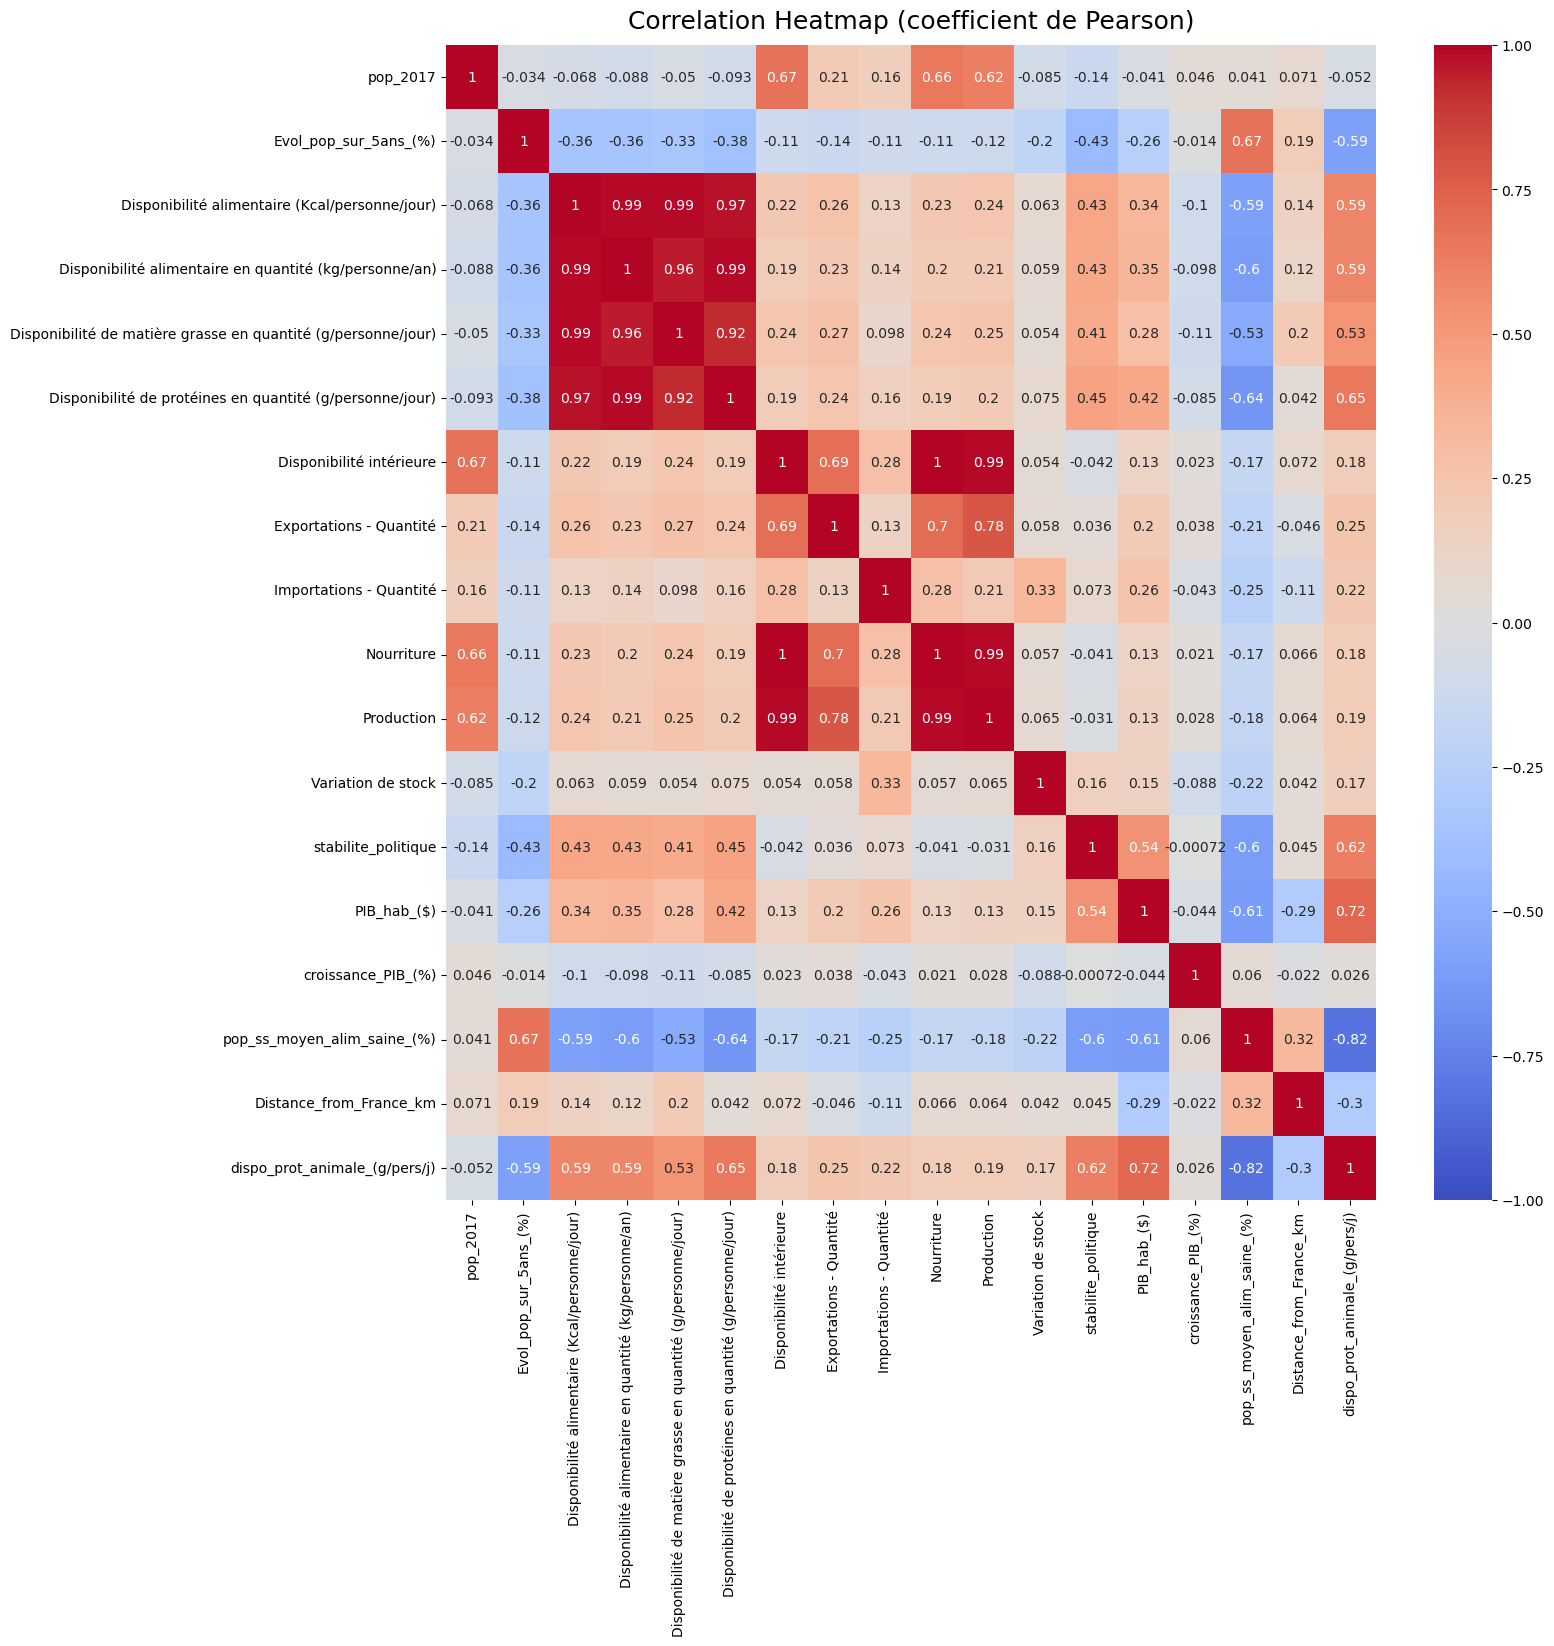

In [88]:
# Sélectionner les colonnes numériques uniquement, excluant les colonnes non pertinentes
data_quanti = df_complet.select_dtypes(include=['float64'])

# Calcul du coefficient de corrélation de Pearson
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(data_quanti.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

# Ajouter un titre à la heatmap
heatmap.set_title('Correlation Heatmap (coefficient de Pearson)', fontdict={'fontsize':18}, pad=12)

# Afficher la heatmap
plt.show()

=> La relation entre PIB par habitant et la part de population ne pouvant s'offrir une nourriture saine est la plus logique et donne de meilleurs résultats à l'évaluation du modèle : c'est celle qui est retenue.

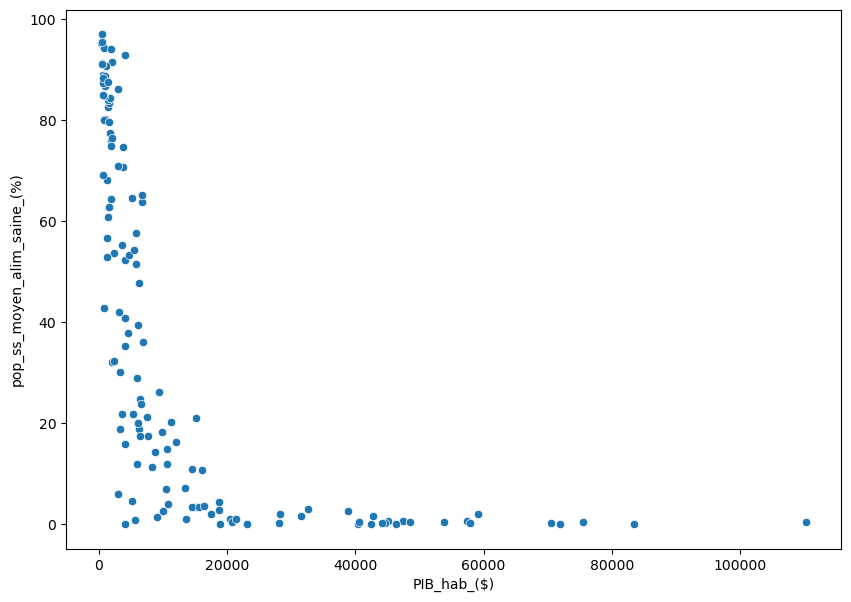

In [89]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_complet, x='PIB_hab_($)', y='pop_ss_moyen_alim_saine_(%)')
plt.show()

R² du modèle: 0.373
RMSE du modèle: 27.638


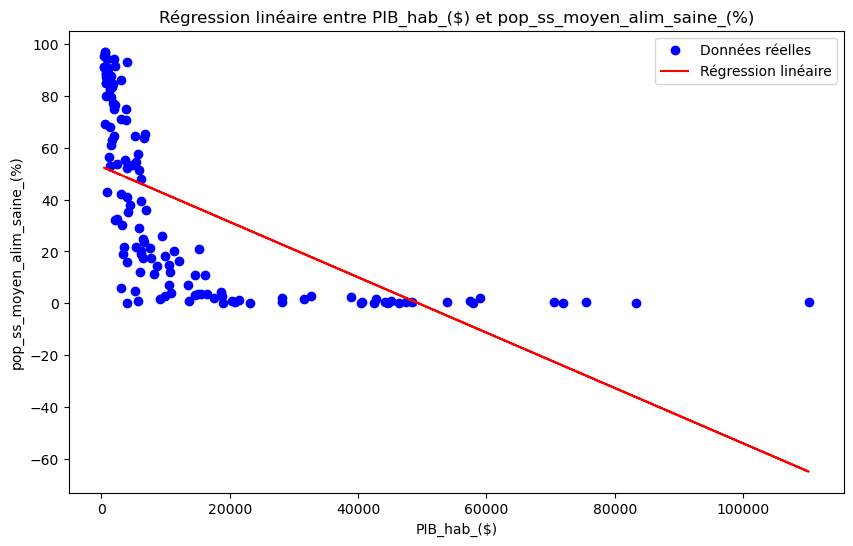

In [90]:
# Filtrer les données pour ne pas avoir de valeurs manquantes dans les colonnes 'PIB_hab_($)' et 'pop_ss_moyen_alim_saine_(%)'
df_filtered = df_complet.dropna(subset=['PIB_hab_($)', 'pop_ss_moyen_alim_saine_(%)'])

# Définir les variables explicative (X) et cible (y)
X = df_filtered[['PIB_hab_($)', ]]  # Variable explicative
y = df_filtered['pop_ss_moyen_alim_saine_(%)']  # Variable cible

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Faire des prédictions
y_pred = model.predict(X)

# Calculer le R² et la RMSE pour évaluer le modèle
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

# Afficher les résultats
print(f"R² du modèle: {r2:.3f}")
print(f"RMSE du modèle: {rmse:.3f}")

# Visualiser les résultats de la régression linéaire
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X, y_pred, color='red', label='Régression linéaire')
plt.xlabel('PIB_hab_($)')
plt.ylabel('pop_ss_moyen_alim_saine_(%)')
plt.title('Régression linéaire entre PIB_hab_($) et pop_ss_moyen_alim_saine_(%)')
plt.legend()
plt.show()

R² du modèle: 0.672
RMSE du modèle: 19.984


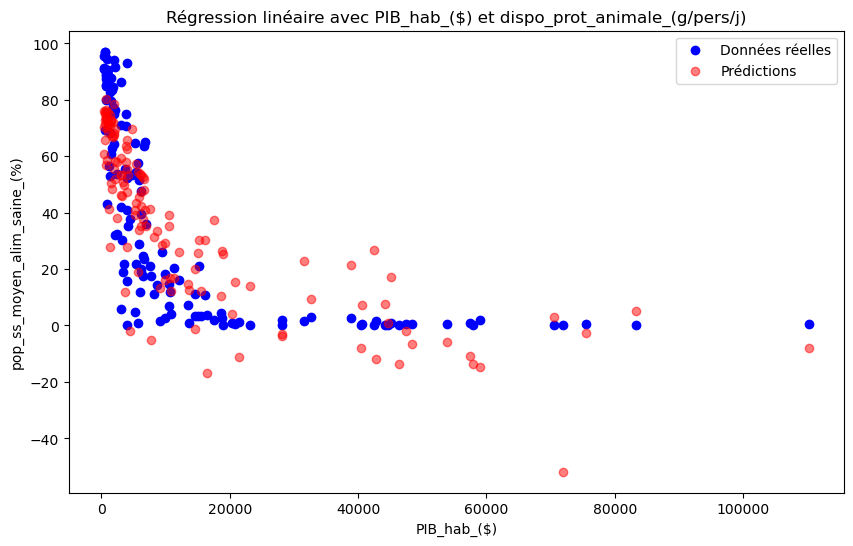

In [91]:
# Filtrer les données pour ne pas avoir de valeurs manquantes dans les colonnes pertinentes
df_filtered = df_complet.dropna(subset=['PIB_hab_($)', 'dispo_prot_animale_(g/pers/j)', 'pop_ss_moyen_alim_saine_(%)'])

# Définir les variables explicatives (X) et la variable cible (y)
X = df_filtered[['PIB_hab_($)', 'dispo_prot_animale_(g/pers/j)']]  # Variables explicatives
y = df_filtered['pop_ss_moyen_alim_saine_(%)']  # Variable cible

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Faire des prédictions
y_pred = model.predict(X)

# Calculer le R² et la RMSE pour évaluer le modèle
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

# Afficher les résultats
print(f"R² du modèle: {r2:.3f}")
print(f"RMSE du modèle: {rmse:.3f}")

# Visualiser les résultats de la régression linéaire (projection sur PIB)
plt.figure(figsize=(10, 6))
plt.scatter(X['PIB_hab_($)'], y, color='blue', label='Données réelles')
plt.scatter(X['PIB_hab_($)'], y_pred, color='red', label='Prédictions', alpha=0.5)
plt.xlabel('PIB_hab_($)')
plt.ylabel('pop_ss_moyen_alim_saine_(%)')
plt.title('Régression linéaire avec PIB_hab_($) et dispo_prot_animale_(g/pers/j)')
plt.legend()
plt.show()

R² du modèle: 0.672
RMSE du modèle: 19.994


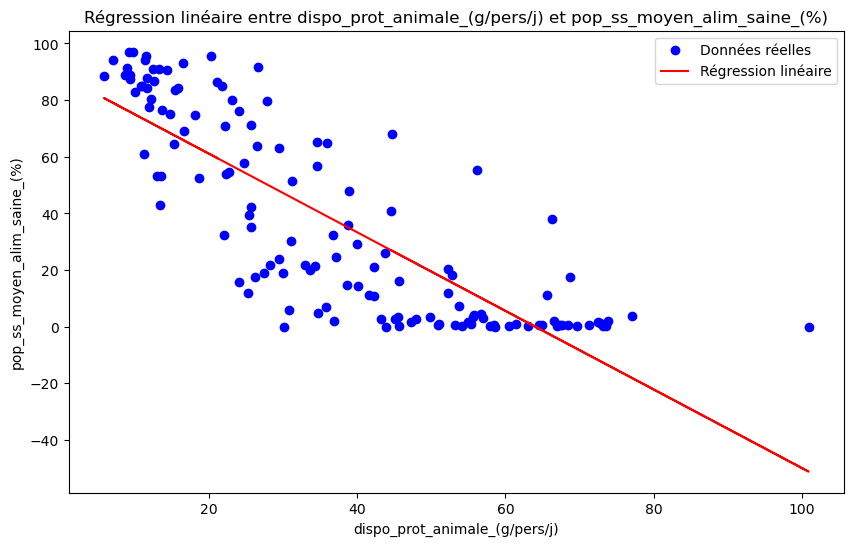

In [92]:
# Filtrer les données pour ne pas avoir de valeurs manquantes dans les colonnes 'PIB_hab_($)' et 'pop_ss_moyen_alim_saine_(%)'
df_filtered = df_complet.dropna(subset=['dispo_prot_animale_(g/pers/j)', 'pop_ss_moyen_alim_saine_(%)'])

# Définir les variables explicative (X) et cible (y)
X = df_filtered[['dispo_prot_animale_(g/pers/j)', ]]  # Variable explicative
y = df_filtered['pop_ss_moyen_alim_saine_(%)']  # Variable cible

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Faire des prédictions
y_pred = model.predict(X)

# Calculer le R² et la RMSE pour évaluer le modèle
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

# Afficher les résultats
print(f"R² du modèle: {r2:.3f}")
print(f"RMSE du modèle: {rmse:.3f}")

# Visualiser les résultats de la régression linéaire
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X, y_pred, color='red', label='Régression linéaire')
plt.xlabel('dispo_prot_animale_(g/pers/j)')
plt.ylabel('pop_ss_moyen_alim_saine_(%)')
plt.title('Régression linéaire entre dispo_prot_animale_(g/pers/j) et pop_ss_moyen_alim_saine_(%)')
plt.legend()
plt.show()

R² du modèle: 0.716
RMSE du modèle: 18.605


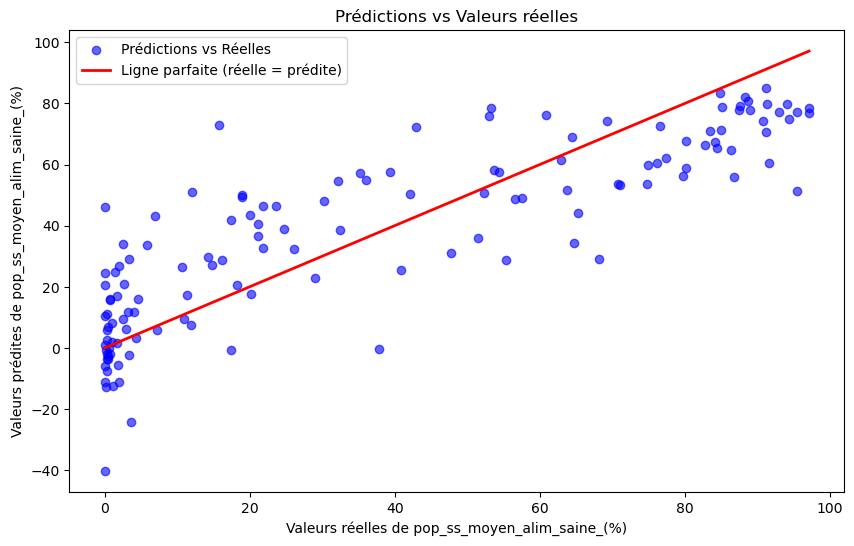

In [93]:
# Filtrer les données pour ne pas avoir de valeurs manquantes dans les colonnes pertinentes
df_filtered = df_complet.dropna(subset=['PIB_hab_($)', 'Evol_pop_sur_5ans_(%)', 'dispo_prot_animale_(g/pers/j)', 'pop_ss_moyen_alim_saine_(%)'])

# Définir les variables explicatives (X) et la variable cible (y)
X = df_filtered[['PIB_hab_($)', 'Evol_pop_sur_5ans_(%)', 'dispo_prot_animale_(g/pers/j)']]  # Variables explicatives
y = df_filtered['pop_ss_moyen_alim_saine_(%)']  # Variable cible

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Faire des prédictions
y_pred = model.predict(X)

# Calculer le R² et la RMSE pour évaluer le modèle
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

# Afficher les résultats
print(f"R² du modèle: {r2:.3f}")
print(f"RMSE du modèle: {rmse:.3f}")

# Visualiser les résultats de la régression linéaire : Prédictions vs Valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Prédictions vs Réelles', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ligne parfaite (réelle = prédite)')
plt.xlabel('Valeurs réelles de pop_ss_moyen_alim_saine_(%)')
plt.ylabel('Valeurs prédites de pop_ss_moyen_alim_saine_(%)')
plt.title('Prédictions vs Valeurs réelles')
plt.legend()
plt.show()

In [94]:
# Filtrer les lignes avec des valeurs manquantes dans la colonne cible
df_missing = df_complet[df_complet['pop_ss_moyen_alim_saine_(%)'].isna()]

# Filtrer les colonnes pertinentes pour les prédictions
# Vérifier que les variables explicatives n'ont pas de valeurs manquantes
df_missing_filtered = df_missing.dropna(subset=['PIB_hab_($)', 'Evol_pop_sur_5ans_(%)', 'dispo_prot_animale_(g/pers/j)'])

# Définir les variables explicatives pour les lignes manquantes
X_missing = df_missing_filtered[['PIB_hab_($)', 'Evol_pop_sur_5ans_(%)', 'dispo_prot_animale_(g/pers/j)']]

# Faire les prédictions sur les lignes manquantes
y_missing_pred = model.predict(X_missing)

# Remplacer les valeurs manquantes dans df_complet par les valeurs prédites
df_complet.loc[df_missing_filtered.index, 'pop_ss_moyen_alim_saine_(%)'] = y_missing_pred

# Vérifier si les valeurs ont été remplacées
print(df_complet.loc[df_missing_filtered.index, ['pop_ss_moyen_alim_saine_(%)']])


     pop_ss_moyen_alim_saine_(%)
1                      80.249100
7                      20.191459
11                     26.890721
13                     14.872353
22                     72.025238
41                     32.951921
46                     23.606447
51                     43.111789
62                     33.802767
69                     42.114129
72                     27.914985
75                     61.027941
99                     59.975975
102                    46.279005
105                    78.282796
137                    63.259501
138                    15.366257
155                    65.471638
166                    21.064737
169                    19.577844
172                    47.434607
190                    41.272540
194                    77.377493
198                    67.968173
206                    24.475898
211                    38.515272
217                    19.977660
218                    76.212001


In [95]:
# Pourcentage de valeurs manquantes
na = round(df_complet.isna().mean()*100,2)
na.loc[na>0]

Variation de stock         0.62
Distance_from_France_km    1.85
dtype: float64

In [96]:
df_complet[df_complet['Distance_from_France_km'].isna()]

,c_zone,zone,pop_2017,Evol_pop_sur_5ans_(%),Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,stabilite_politique,PIB_hab_($),croissance_PIB_(%),pop_ss_moyen_alim_saine_(%),Distance_from_France_km,dispo_prot_animale_(g/pers/j)
31,37,République centrafricaine,4596023.0,3.47,Viande de Volailles,8.0,2.29,0.48,0.78,11.0,0.0,4.0,11.0,7.0,0.0,-2.01,414.740323,13.552250,95.4,NaN,20.29
33,39,Tchad,15016753.0,14.86,Viande de Volailles,2.0,0.45,0.10,0.15,7.0,0.0,1.0,7.0,6.0,0.0,-1.29,884.869685,2.122355,84.9,NaN,21.76
136,154,Macédoine du Nord,2081996.0,0.37,Viande de Volailles,68.0,19.73,4.17,7.01,41.0,1.0,40.0,41.0,2.0,0.0,-0.25,5353.775388,5.946111,21.8,NaN,32.91


In [97]:
from geopy.distance import geodesic

# Coordonnées de Paris, France
paris_coords = (48.8566, 2.3522)

# Coordonnées des capitales des pays
capitals_coords = {
    'République centrafricaine': (4.3947, 18.5582),  # Bangui
    'Tchad': (12.1348, 15.0557),  # N'Djamena
    'Macédoine du Nord': (41.9981, 21.4254)  # Skopje
}

# Calculer les distances géodésiques entre Paris et les capitales
distances = {}
for country, coords in capitals_coords.items():
    distance = geodesic(paris_coords, coords).kilometers
    distances[country] = distance

# Afficher les distances calculées
for country, distance in distances.items():
    print(f"La distance entre Paris et {country} est de {distance:.2f} km")


La distance entre Paris et République centrafricaine est de 5162.11 km
La distance entre Paris et Tchad est de 4237.71 km
La distance entre Paris et Macédoine du Nord est de 1669.62 km


In [98]:
# Remplir les valeurs manquantes dans 'Distance_from_France_km'
df_complet.loc[df_complet['zone'] == 'République centrafricaine', 'Distance_from_France_km'] = distances['République centrafricaine']
df_complet.loc[df_complet['zone'] == 'Tchad', 'Distance_from_France_km'] = distances['Tchad']
df_complet.loc[df_complet['zone'] == 'Macédoine du Nord', 'Distance_from_France_km'] = distances['Macédoine du Nord']

# Vérifier que les valeurs ont été mises à jour
print(df_complet[df_complet['zone'].isin(['République centrafricaine', 'Tchad', 'Macédoine du Nord'])][['zone', 'Distance_from_France_km']])


                          zone  Distance_from_France_km
31   République centrafricaine              5162.109524
33                       Tchad              4237.708086
136          Macédoine du Nord              1669.619284


In [99]:
df_complet[df_complet['Variation de stock'].isna()]

,c_zone,zone,pop_2017,Evol_pop_sur_5ans_(%),Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,stabilite_politique,PIB_hab_($),croissance_PIB_(%),pop_ss_moyen_alim_saine_(%),Distance_from_France_km,dispo_prot_animale_(g/pers/j)
150,170,Pérou,31444298.0,6.16,Viande de Volailles,62.0,13.47,3.72,6.71,1523.0,1.0,60.0,424.0,1465.0,NaN,-0.26,6676.307787,9.958317,23.7,10208.678672,29.5


In [100]:
df_complet.loc[df_complet['zone'] == 'Pérou', 'Variation de stock'] = '0'

In [101]:
# Pourcentage de valeurs manquantes
na = round(df_complet.isna().mean()*100,2)
na.loc[na>0]

Series([], dtype: float64)

In [102]:
# Doublons sur les codes pays
df_complet.loc[df_complet[['c_zone']].duplicated(keep=False),:]

,c_zone,zone,pop_2017,Evol_pop_sur_5ans_(%),Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,stabilite_politique,PIB_hab_($),croissance_PIB_(%),pop_ss_moyen_alim_saine_(%),Distance_from_France_km,dispo_prot_animale_(g/pers/j)


In [103]:
df_complet.describe()

,c_zone,pop_2017,Evol_pop_sur_5ans_(%),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,stabilite_politique,PIB_hab_($),croissance_PIB_(%),pop_ss_moyen_alim_saine_(%),Distance_from_France_km,dispo_prot_animale_(g/pers/j)
count,162.000000,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,126.209877,4.488174e+07,6.184691,73.654321,19.992407,4.841975,7.031543,714.339506,106.043210,86.975309,681.641975,747.580247,-0.081491,13539.144658,7.849212,38.700434,5767.144075,36.342901
std,74.067657,1.574901e+08,5.595813,59.713220,15.629261,4.161469,5.475764,2236.719332,469.373024,179.310583,2185.218825,2544.453194,0.903633,18782.402934,6.728577,33.170584,3825.580941,19.730913
min,1.000000,5.204500e+04,-7.560000,0.000000,0.130000,0.030000,0.040000,2.000000,0.000000,0.000000,2.000000,0.000000,-2.940000,414.740323,-27.795932,0.000000,0.000000,5.850000
25%,60.750000,2.987040e+06,2.075000,22.000000,6.610000,1.492500,2.237500,33.500000,0.000000,3.000000,30.250000,15.000000,-0.637500,1938.911891,5.263413,4.075000,2236.626821,20.292500
50%,121.500000,9.875108e+06,5.495000,64.000000,18.090000,3.745000,6.505000,109.000000,1.000000,16.000000,102.000000,74.500000,-0.040000,5939.481873,7.550404,31.200000,5447.209280,34.650000
75%,188.750000,3.135938e+07,10.382500,104.000000,28.782500,6.357500,9.897500,374.250000,15.000000,81.250000,365.250000,445.250000,0.645000,16106.583909,10.377953,70.325000,8243.894232,51.695000
max,276.000000,1.421022e+09,25.030000,243.000000,72.310000,17.860000,27.870000,18266.000000,4223.000000,1069.000000,18100.000000,21914.000000,1.600000,110203.008202,36.133401,97.100000,19040.278790,100.900000


## <font>6. Création variables supplémentaires<a class="anchor" id="1_6"></a></font>

Afin de caractériser au mieux les pays à partir des bilans alimentaires, différents taux sont calculés et ajoutés aux variables :

**tx_prod_dispo**  =  Taux de production par rapport à la disponibilité intérieure


$$ tx_prod_dispo = \frac{Production}{Disponibilité~intérieure}\times 100$$ 
- Interprétation : Un taux élevé signifie que la production nationale couvre une grande partie de la demande intérieure. Un taux bas signifie que la demande intérieure est principalement couverte par d'autres sources (comme les importations).
 
 
**tx_import_dispo** = Taux d'importation par rapport à la disponibilité intérieure


$$ tx_import_dispo = \frac{Importations}{Disponibilité~intérieure}\times 100$$ 
- Interprétation : Un taux élevé indique une forte dépendance aux importations pour répondre à la demande intérieure. Un taux bas suggère une moindre dépendance.
     
    
    
**tx_prod_import** = Taux de production par rapport à l'importation


$$ tx_prod_import = \frac{Production}{Importation}\times 100$$ 
- Interprétation : Un taux supérieur à 100% signifie que la production est supérieure aux importations, ce qui suggère une autosuffisance. Un taux inférieur à 100% indique une dépendance aux importations.
     
     
**Part_volaille_dispo_prot** = Part de la viande de volaille dans la disponibilité totale en protéine animale, c'est-à-dire importance de la viande de volaille dans les apports en protéine


In [104]:
# Remplacer les valeurs non numériques par NaN
df_complet['Variation de stock'] = pd.to_numeric(df_complet['Variation de stock'], errors='coerce')

# Vérifier si la conversion a réussi
print(df_complet['Variation de stock'].dtype)

# Remplacer les valeurs non numériques (qui ont été converties en NaN) par une valeur souhaitée si nécessaire
# Par exemple, si vous voulez remplacer les NaN par 0
df_complet['Variation de stock'].fillna(0, inplace=True)

# Vérifier les premières lignes après la conversion
print(df_complet[['Variation de stock']].head())

float64
   Variation de stock
0                -2.0
1                 0.0
2                 4.0
3                 0.0
6                 0.0


In [105]:
df_complet = df_complet.assign(
    tx_prod_dispo = round(df_complet['Production']/df_complet['Disponibilité intérieure']*100,2),
    tx_import_dispo = round(df_complet['Importations - Quantité']/df_complet['Disponibilité intérieure']*100,2),
    tx_prod_import = np.where(df_complet['Importations - Quantité'] > 0,
                              round((df_complet['Production'] / df_complet['Importations - Quantité']) * 100, 2),
                              np.nan),
       part_prot_volaille_dispo = round(df_complet['Disponibilité de protéines en quantité (g/personne/jour)']/df_complet['dispo_prot_animale_(g/pers/j)']*100,2)
    )

In [106]:
df_complet['dispo_prot_animale_(g/pers/j)'] = round((df_complet['dispo_prot_animale_(g/pers/j)'] * 365) / 1000, 2)

In [107]:
df_complet.rename(columns={'dispo_prot_animale_(g/pers/j)': 'dispo_prot_animale_(kg/pers/an)'}, inplace=True)


In [108]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 229
Data columns (total 25 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   c_zone                                                         162 non-null    int64  
 1   zone                                                           162 non-null    object 
 2   pop_2017                                                       162 non-null    float64
 3   Evol_pop_sur_5ans_(%)                                          162 non-null    float64
 4   Produit                                                        162 non-null    object 
 5   Disponibilité alimentaire (Kcal/personne/jour)                 162 non-null    float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         162 non-null    float64
 7   Disponibilité de matière grasse en quantité (g/personne/jour)  162 

In [109]:
df_complet = df_complet.drop(columns =['pop_2017', 'c_zone', 'Produit', 'Disponibilité alimentaire (Kcal/personne/jour)', 
                              'Disponibilité de matière grasse en quantité (g/personne/jour)', 
                              'Disponibilité de protéines en quantité (g/personne/jour)',
                              'Nourriture', 
                              'Production',
                              'Exportations - Quantité',
                              'Importations - Quantité',
                              'Disponibilité intérieure', 
                              'Variation de stock',
                              'croissance_PIB_(%)'])

# <font color='blue'>Partie 2 - Analyse univariée et Bivariée<a class="anchor" id="partie2"></a></font>

## <font>1. Analyse Univariée<a class="anchor" id="2_1"></a></font>

In [110]:
# Réinitialiser l'index et supprimer l'ancien index
df_complet.reset_index(drop=True, inplace=True)

In [111]:

# Définir une fonction pour détecter les outliers avec la méthode IQR et afficher le top 5
def detect_top_outliers_iqr(df, column, top_n=5):
    # Calculer Q1 (1er quartile) et Q3 (3e quartile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Définir les seuils pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifier les outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].copy()

    # Calculer l'écart par rapport à la borne la plus proche pour trier les outliers
    outliers['outlier_score'] = outliers[column].apply(lambda x: abs(x - (upper_bound if x > upper_bound else lower_bound)))

    # Trier les outliers par cet écart et afficher uniquement le top 5
    top_outliers = outliers.sort_values(by='outlier_score', ascending=False).head(top_n)

    return top_outliers

# Sélectionner les colonnes numériques uniquement
df_numerical = df_complet.select_dtypes(include=['float64', 'int64'])

# Parcourir chaque colonne et afficher les pays du top 5 des outliers
for column in df_numerical.columns:
    top_outliers_df = detect_top_outliers_iqr(df_complet, column)
    
    if not top_outliers_df.empty:  # S'il y a des outliers, les afficher
        print(f"Top 5 des outliers dans la colonne '{column}':")
        print(top_outliers_df[['zone', column, 'outlier_score']])  # Afficher les pays et les valeurs correspondantes
        print("\n")

Top 5 des outliers dans la colonne 'Evol_pop_sur_5ans_(%)':
     zone  Evol_pop_sur_5ans_(%)  outlier_score
141  Oman                  25.03        2.18625


Top 5 des outliers dans la colonne 'Disponibilité alimentaire en quantité (kg/personne/an)':
                                zone  \
122  Saint-Vincent-et-les Grenadines   
67                            Israël   
154                            Samoa   

     Disponibilité alimentaire en quantité (kg/personne/an)  outlier_score  
122                                              72.31            10.26875  
67                                               67.39             5.34875  
154                                              64.77             2.72875  


Top 5 des outliers dans la colonne 'stabilite_politique':
            zone  stabilite_politique  outlier_score
155        Yémen                -2.94        0.37875
1    Afghanistan                -2.80        0.23875


Top 5 des outliers dans la colonne 'PIB_hab_($)':
         

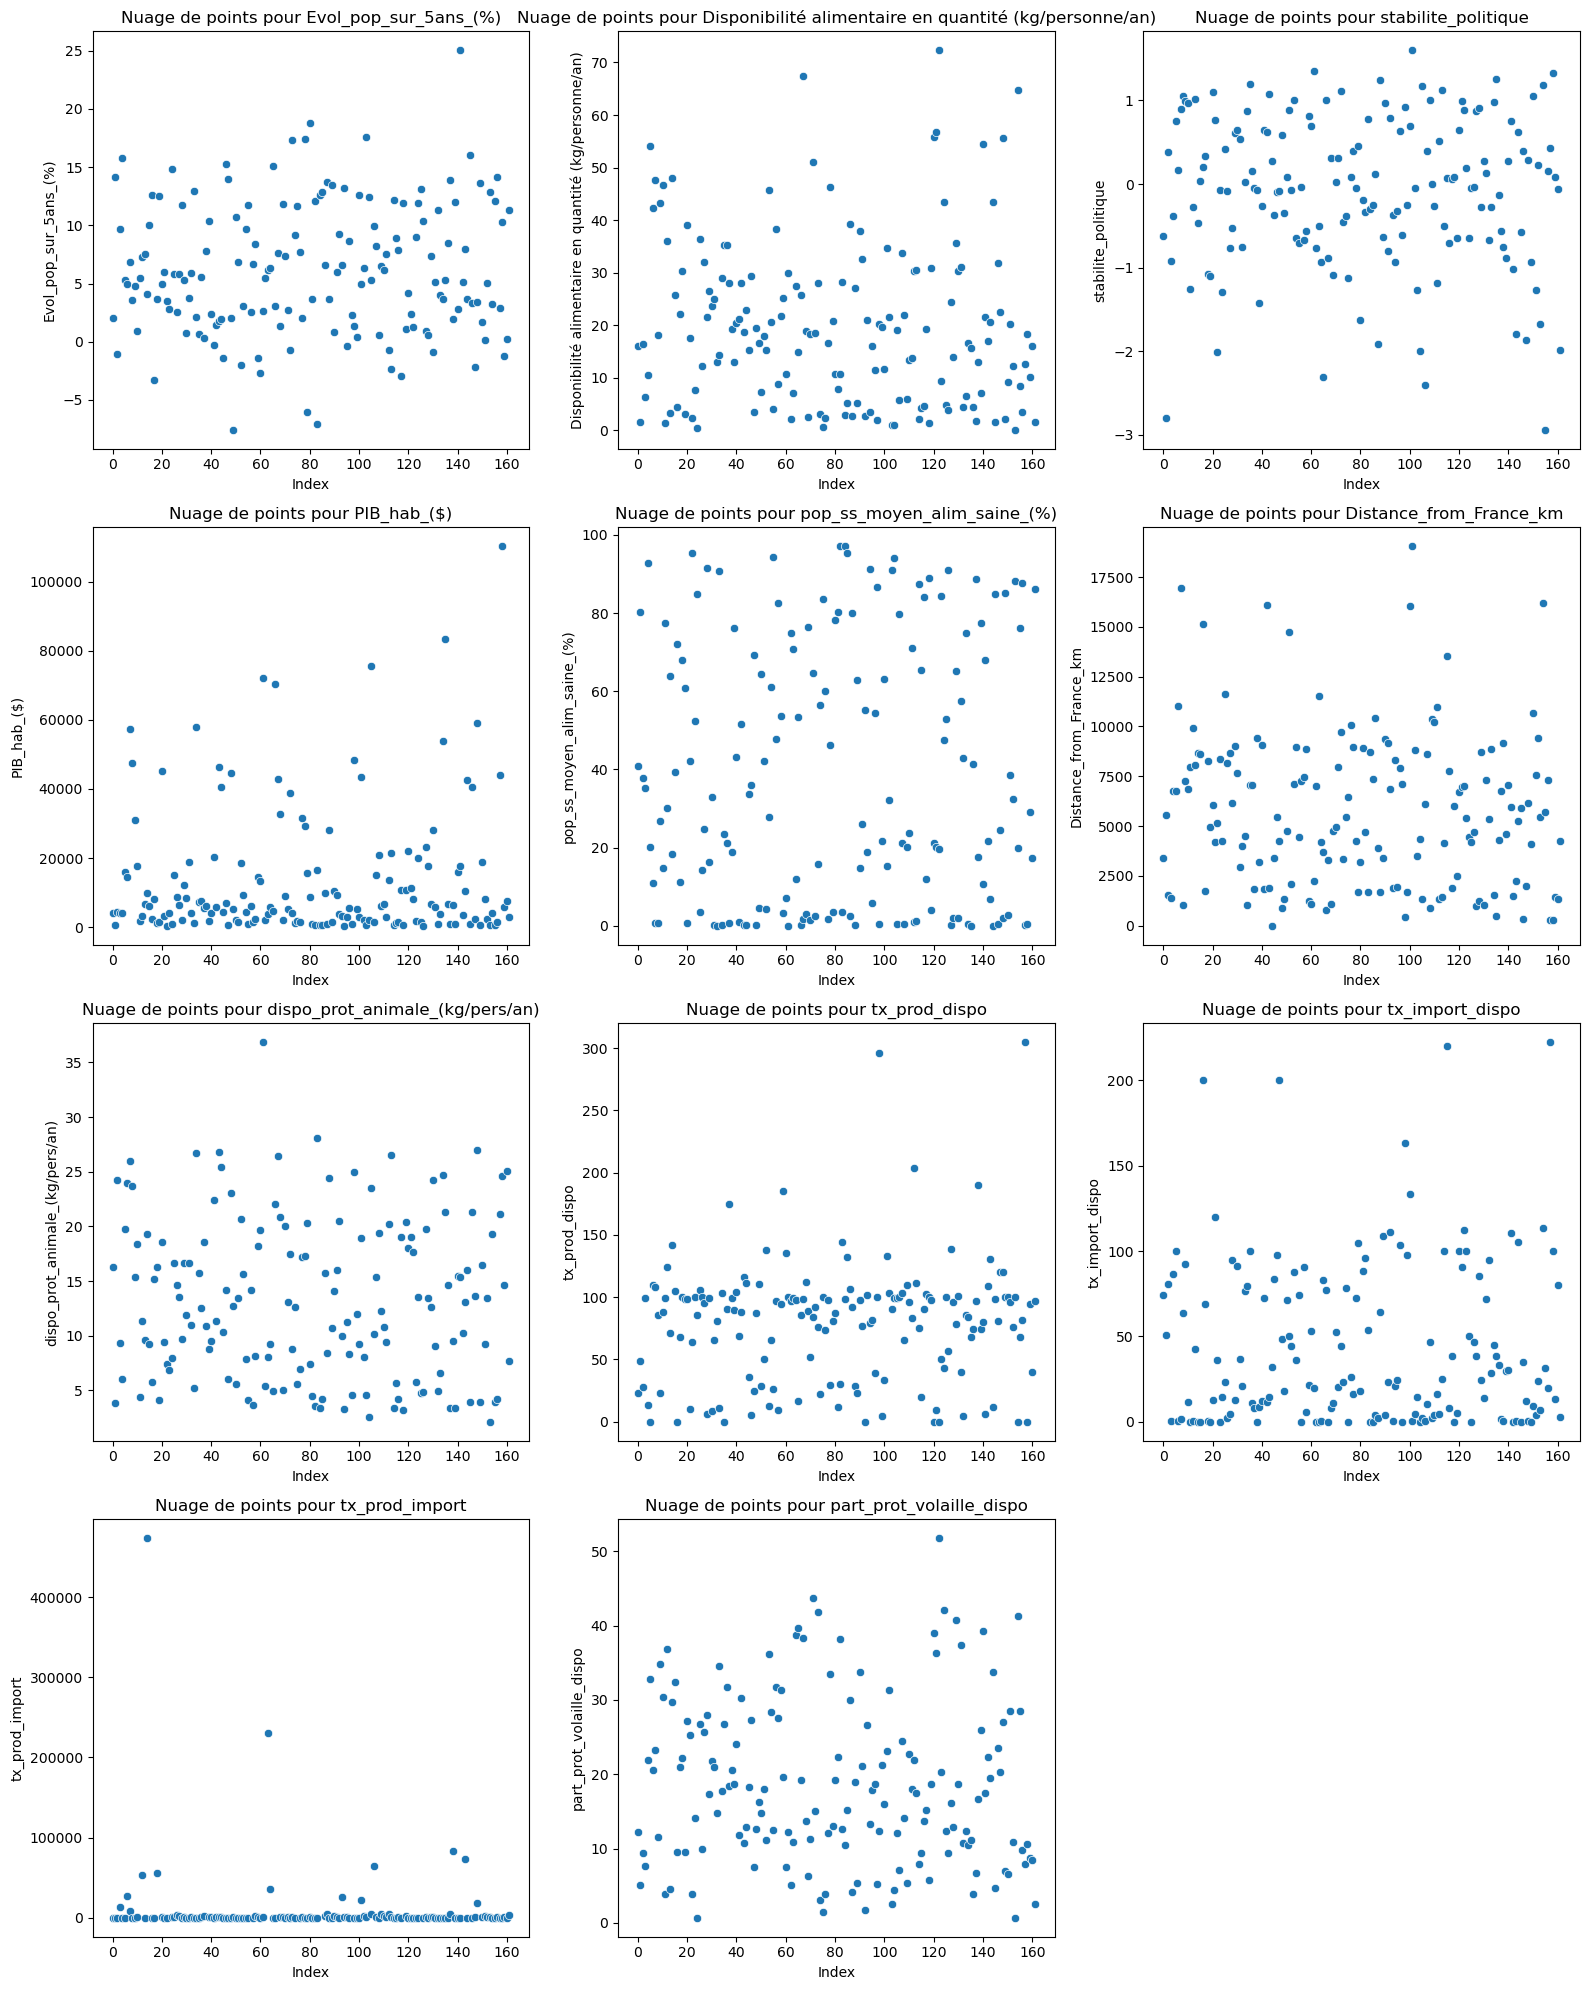

In [112]:
# Sélectionner uniquement les colonnes numériques
df_numerical = df_complet.select_dtypes(include=['float64'])

# Définir le nombre de lignes et de colonnes du tableau de graphiques
n_cols = 3  # Nombre de colonnes dans la grille
n_rows = math.ceil(len(df_numerical.columns) / n_cols)  # Nombre de lignes nécessaires

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))  # Ajuster la taille du tableau

# Boucle pour créer chaque scatter plot
for idx, column in enumerate(df_numerical.columns):
    row = idx // n_cols
    col = idx % n_cols
    sns.scatterplot(data=df_complet, x=df_complet.index, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Nuage de points pour {column}', fontsize=12)
    axes[row, col].set_xlabel('Index')
    axes[row, col].set_ylabel(column)

# Supprimer les sous-graphiques vides
for idx in range(len(df_numerical.columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

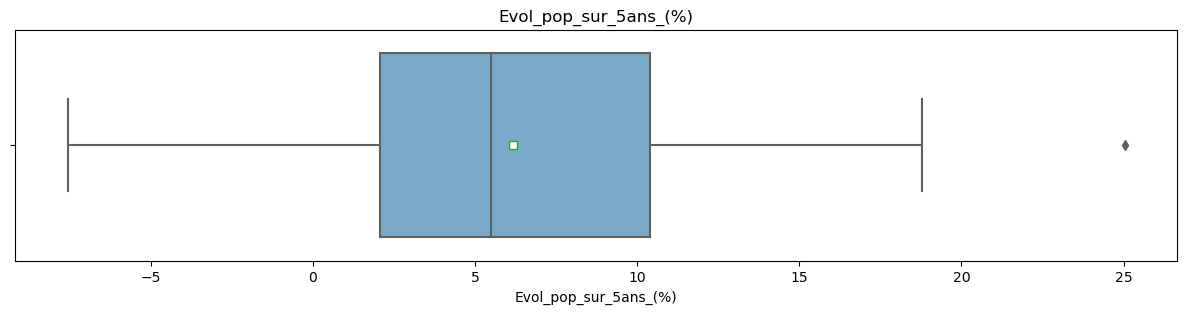


Nombre d'outliers détectés pour Evol_pop_sur_5ans_(%) => 1
     zone  Evol_pop_sur_5ans_(%)
141  Oman                  25.03


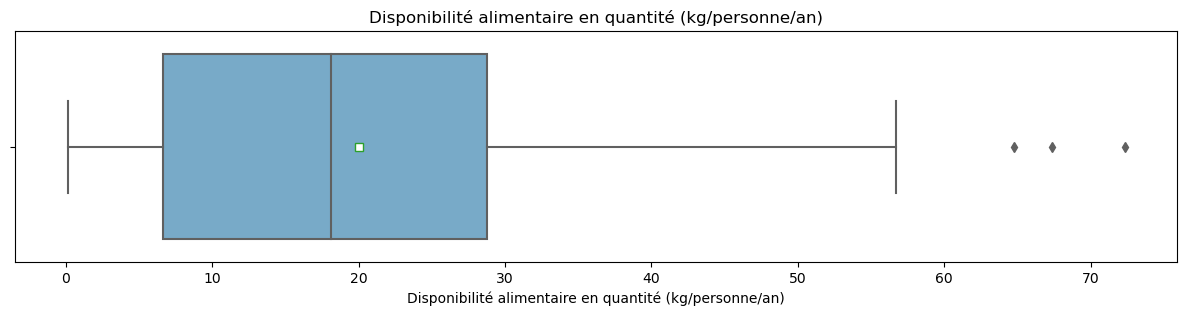


Nombre d'outliers détectés pour Disponibilité alimentaire en quantité (kg/personne/an) => 2
                                zone  \
67                            Israël   
122  Saint-Vincent-et-les Grenadines   

     Disponibilité alimentaire en quantité (kg/personne/an)  
67                                               67.39       
122                                              72.31       


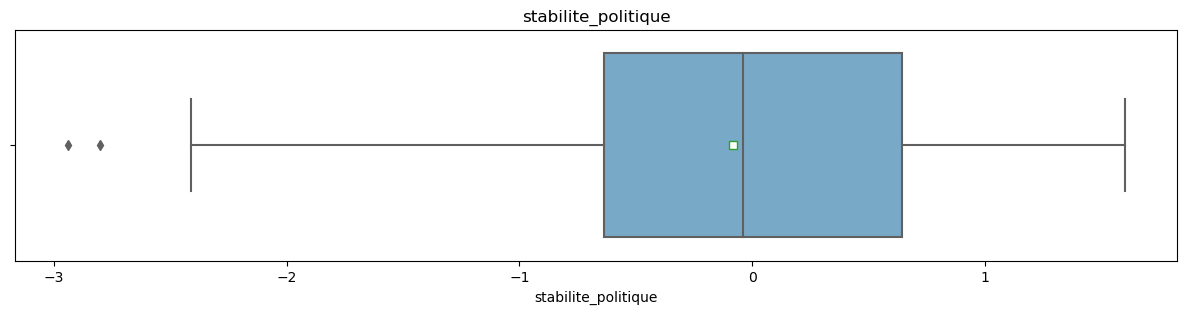


Nombre d'outliers détectés pour stabilite_politique => 2
            zone  stabilite_politique
155        Yémen                -2.94
1    Afghanistan                -2.80


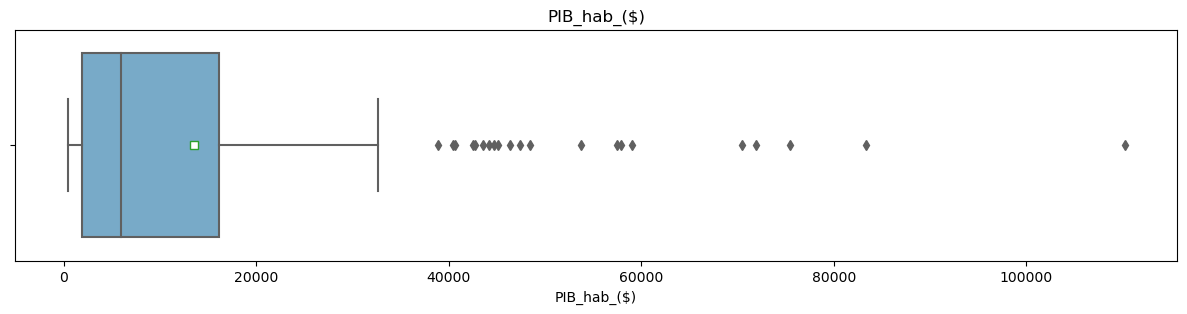


Nombre d'outliers détectés pour PIB_hab_($) => 5
           zone    PIB_hab_($)
66      Irlande   70491.993301
61      Islande   71961.532046
105     Norvège   75490.688450
135      Suisse   83353.597572
158  Luxembourg  110203.008202


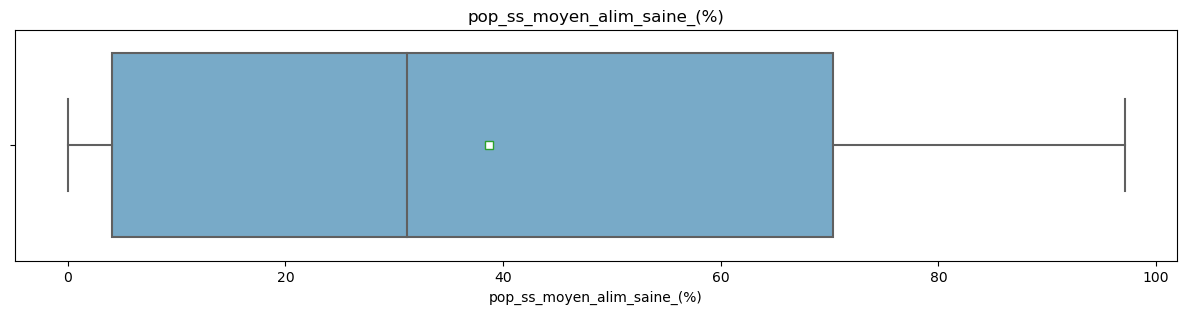


Nombre d'outliers détectés pour pop_ss_moyen_alim_saine_(%) => 0
Empty DataFrame
Columns: [zone, pop_ss_moyen_alim_saine_(%)]
Index: []


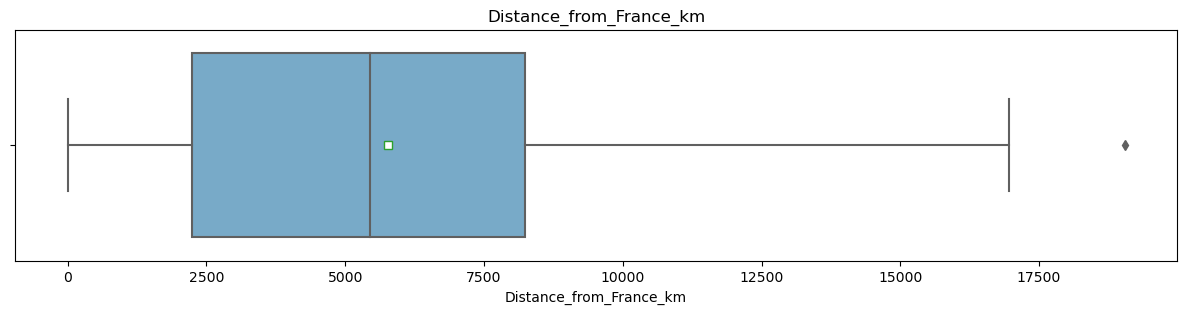


Nombre d'outliers détectés pour Distance_from_France_km => 1
                 zone  Distance_from_France_km
101  Nouvelle-Zélande              19040.27879


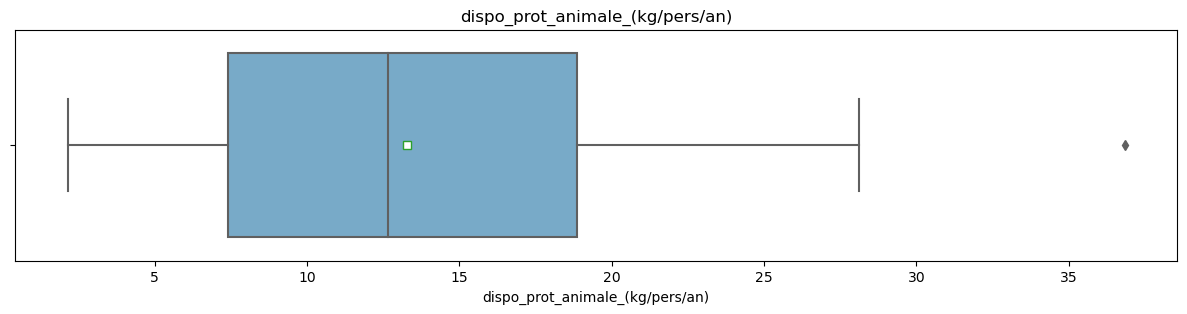


Nombre d'outliers détectés pour dispo_prot_animale_(kg/pers/an) => 1
       zone  dispo_prot_animale_(kg/pers/an)
61  Islande                            36.83


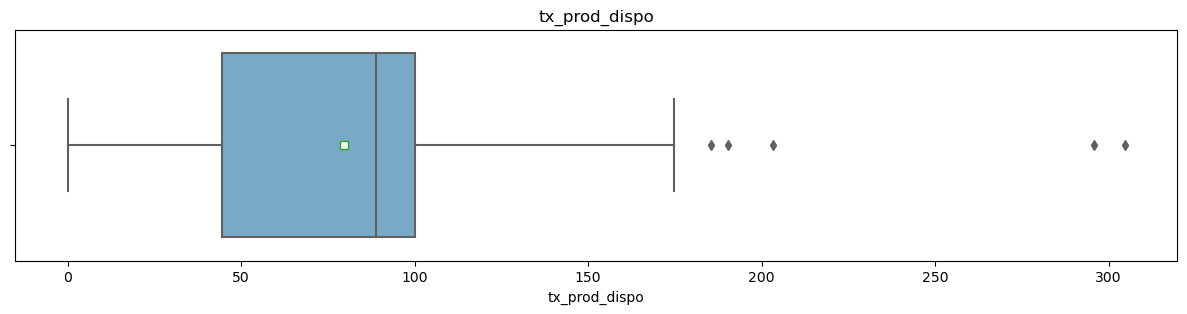


Nombre d'outliers détectés pour tx_prod_dispo => 2
         zone  tx_prod_dispo
98   Pays-Bas         295.70
157  Belgique         304.61


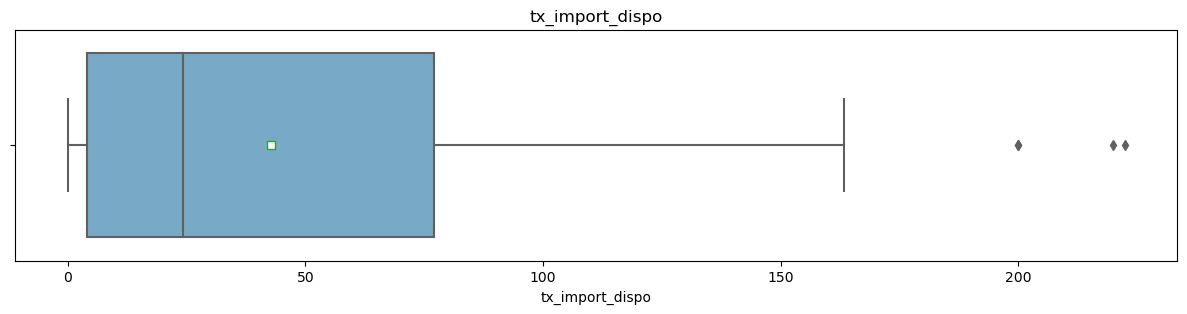


Nombre d'outliers détectés pour tx_import_dispo => 4
             zone  tx_import_dispo
16   Îles Salomon           200.00
47         Gambie           200.00
115   Timor-Leste           220.00
157      Belgique           222.37


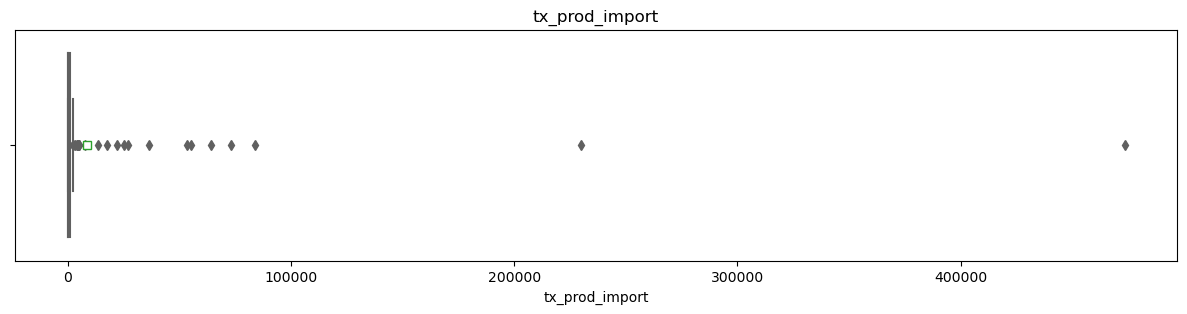


Nombre d'outliers détectés pour tx_prod_import => 2
         zone  tx_prod_import
63  Indonésie       230100.00
14     Brésil       473366.67


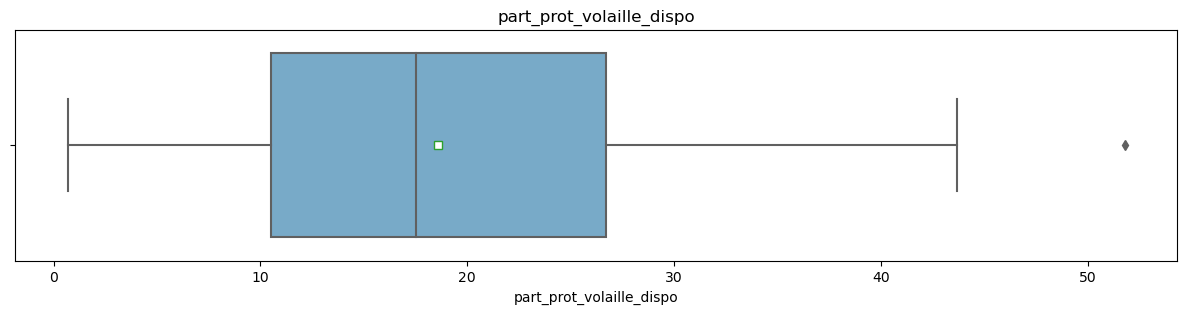


Nombre d'outliers détectés pour part_prot_volaille_dispo => 0
Empty DataFrame
Columns: [zone, part_prot_volaille_dispo]
Index: []


In [113]:
# Sélectionner uniquement les colonnes numériques du DataFrame
numeric_columns = df_complet.select_dtypes(include=['float64']).columns.tolist()

# Boucle pour chaque colonne numérique
for col in numeric_columns:
    plt.figure(figsize=(15, 3))
    sns.boxplot(data=df_complet, x=col, 
                orient='h', 
                showmeans=True, 
                palette="Blues", 
                meanprops={"marker": "s", "markerfacecolor": "white"})
    plt.title(col)
    plt.show()
      
    # Application de la fonction à la série subset
    subset = df_complet[col].dropna() 
    outliers = detectOutlier(subset, 3)
    
    # Filtrer les lignes avec les outliers détectés
    df_outliers = df_complet.loc[df_complet[col].isin(outliers), ['zone', col]].sort_values(col)
    
    # Afficher les outliers détectés
    print(f"\nNombre d'outliers détectés pour {col} => {len(outliers)}")
    print(df_outliers)

In [114]:
# Liste des pays à supprimer
pays_a_supprimer = ['Saint-Vincent-et-les Grenadines', 'Îles Salomon', 'Gambie', 'Timor-Leste', 'Samoa', 
                    'Antigua-et-Barbuda', 'Bahamas', 'Barbade', 'Dominique', 'Grenade', 'Jamaïque', 
                    'Saint-Kitts-et-Nevis', 'Sainte-Lucie', 'Suriname', 'Trinité-et-Tobago', 'France']

# Suppression des lignes correspondantes aux pays
df_complet = df_complet[~df_complet['zone'].isin(pays_a_supprimer)]

# Vérification des suppressions
print("Lignes restantes après suppression des pays spécifiés :")
print(df_complet['zone'].unique())


Lignes restantes après suppression des pays spécifiés :
['Arménie' 'Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Argentine'
 'Australie' 'Autriche' 'Bangladesh' 'Bolivie (État plurinational de)'
 'Botswana' 'Brésil' 'Belize' 'Bulgarie' 'Myanmar' 'Cameroun' 'Canada'
 'Cabo Verde' 'République centrafricaine' 'Sri Lanka' 'Tchad' 'Chili'
 'Chine, continentale' 'Colombie' 'Congo' 'Costa Rica' 'Cuba' 'Chypre'
 'Azerbaïdjan' 'Bénin' 'Danemark' 'République dominicaine' 'Bélarus'
 'Équateur' 'Égypte' 'El Salvador' 'Estonie' 'Fidji' 'Finlande' 'Géorgie'
 'Gabon' 'Allemagne' 'Bosnie-Herzégovine' 'Ghana' 'Kiribati' 'Grèce'
 'Guatemala' 'Guinée' 'Guyana' 'Haïti' 'Honduras' 'Hongrie' 'Croatie'
 'Islande' 'Inde' 'Indonésie' "Iran (République islamique d')" 'Iraq'
 'Irlande' 'Israël' 'Italie' "Côte d'Ivoire" 'Kazakhstan' 'Japon'
 'Jordanie' 'Kirghizistan' 'Kenya' 'Cambodge' 'République de Corée'
 'Koweït' 'Lettonie' 'Liban' 'Lesotho' 'Libéria' 'Lituanie' 'Madagascar'
 'Malawi' 'Malaisie' 'Mali' 'Malte' 

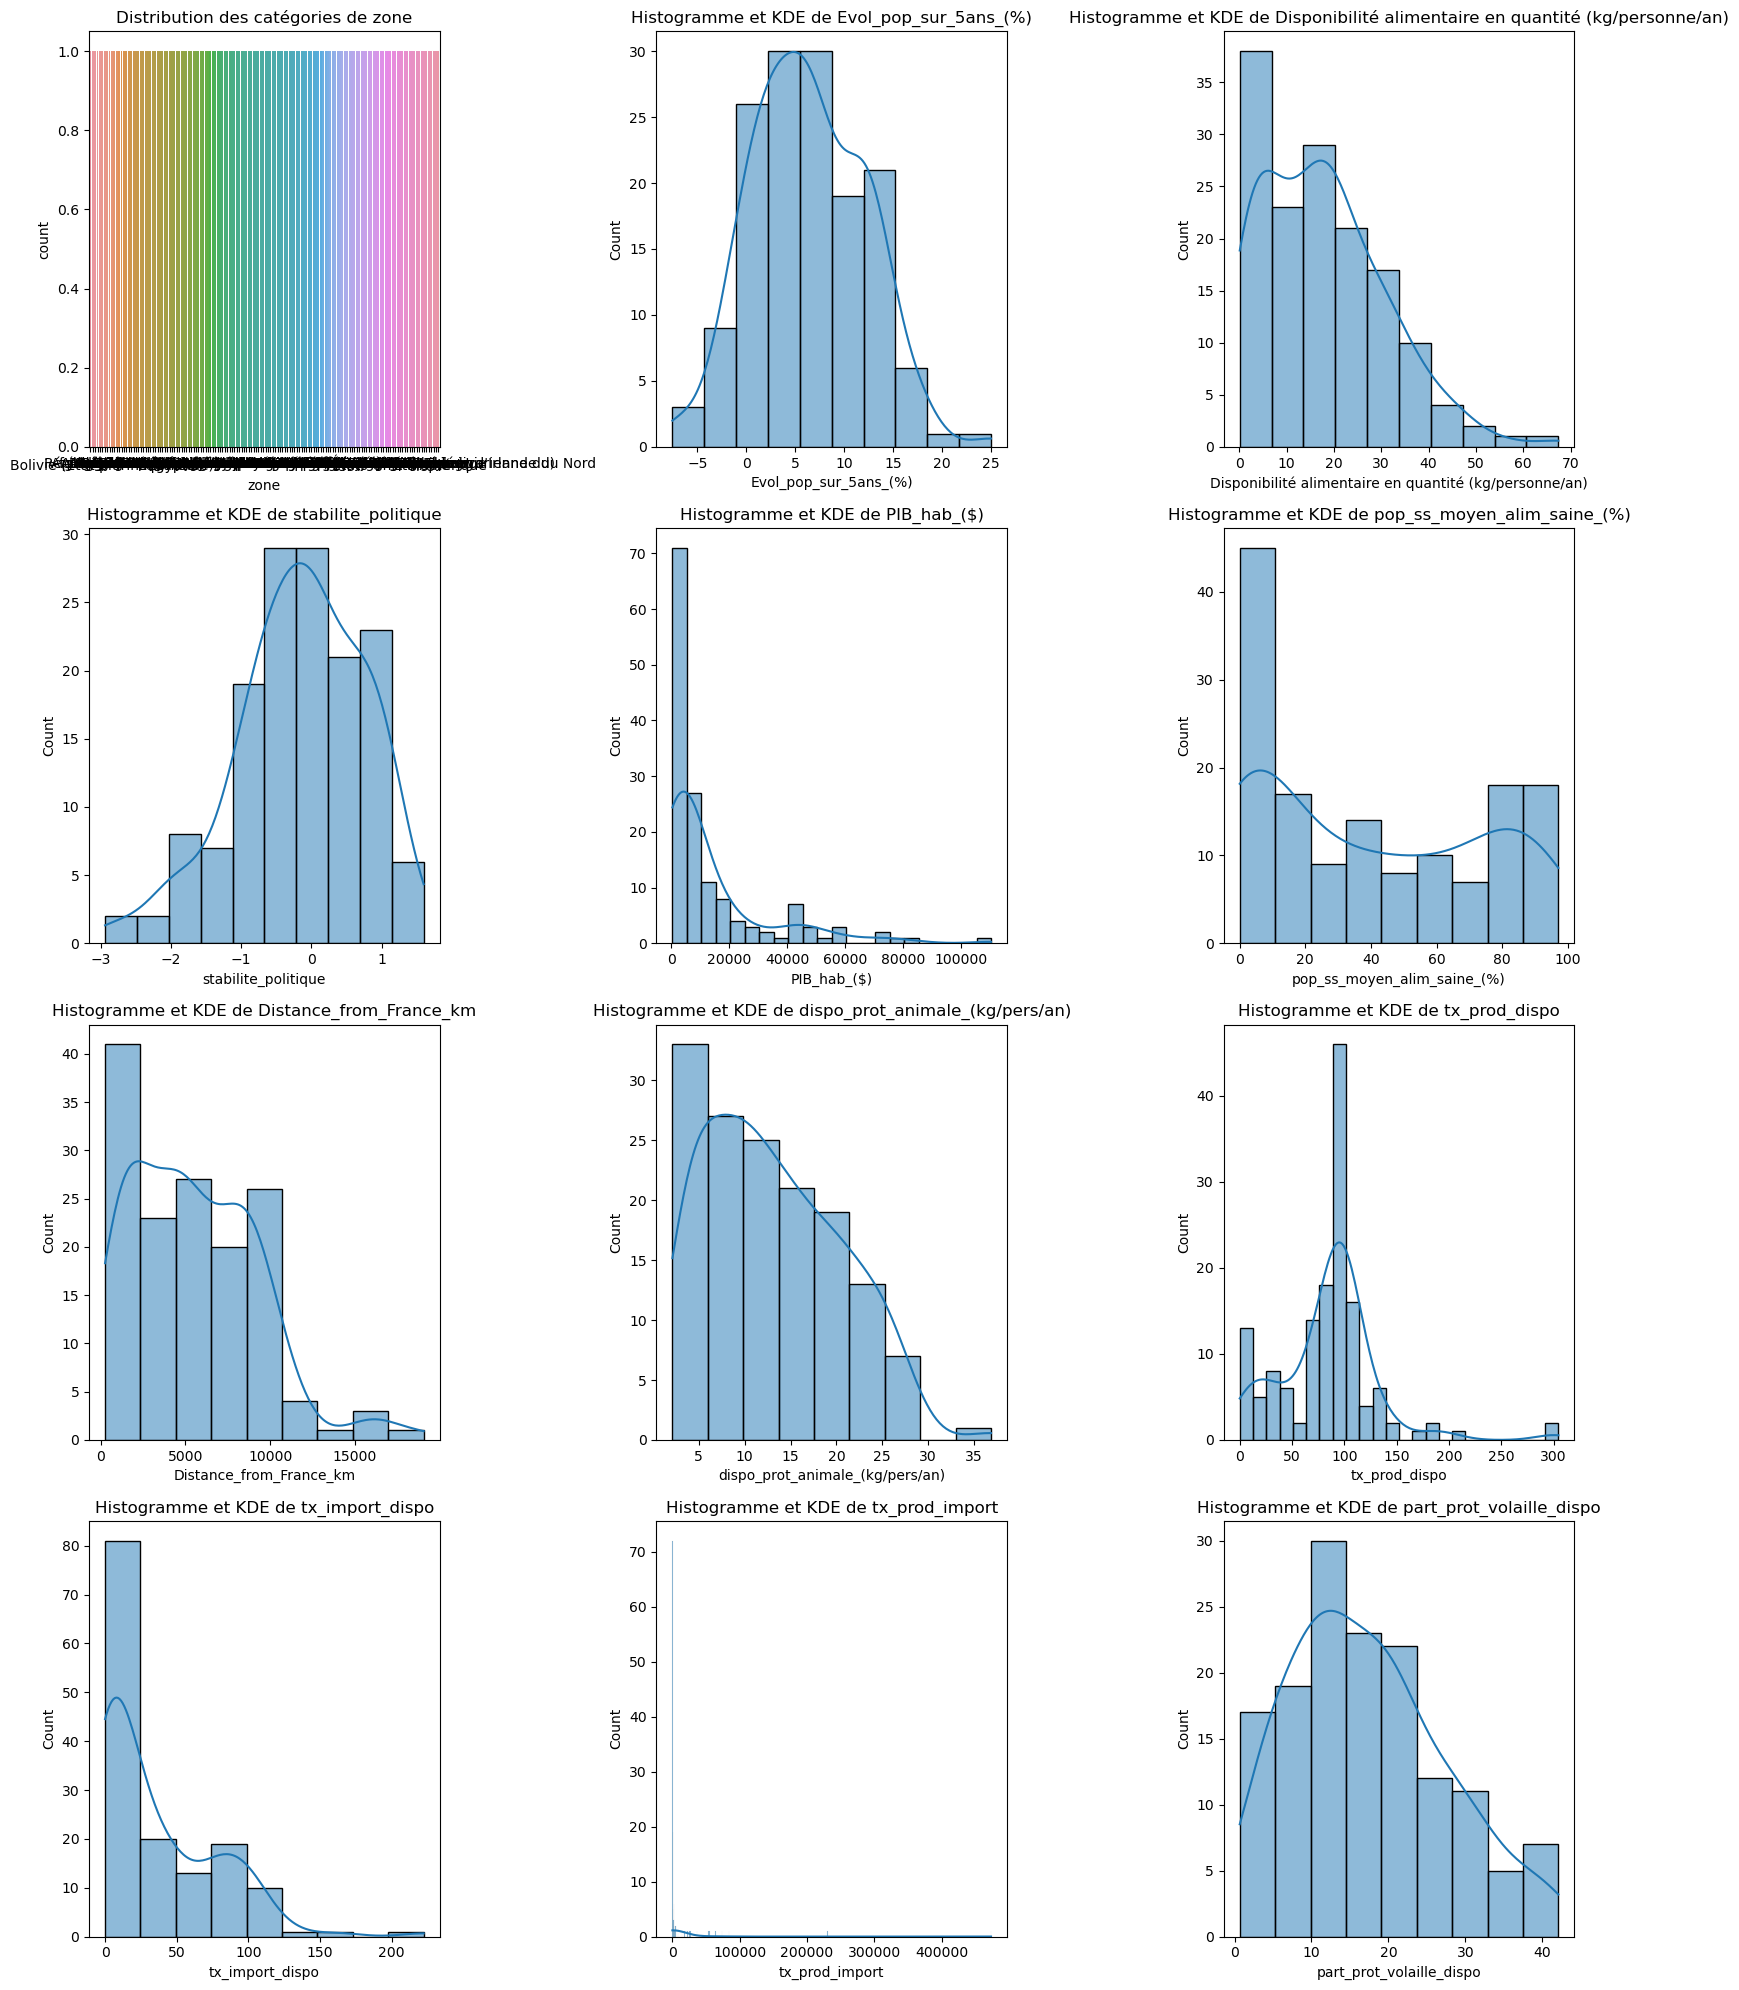


Valeurs manquantes dans chaque colonne :
                                                    Valeurs manquantes
zone                                                                 0
Evol_pop_sur_5ans_(%)                                                0
Disponibilité alimentaire en quantité (kg/perso...                   0
stabilite_politique                                                  0
PIB_hab_($)                                                          0
pop_ss_moyen_alim_saine_(%)                                          0
Distance_from_France_km                                              0
dispo_prot_animale_(kg/pers/an)                                      0
tx_prod_dispo                                                        0
tx_import_dispo                                                      0
tx_prod_import                                                      18
part_prot_volaille_dispo                                             0


In [115]:
# Définir le nombre de colonnes dans le tableau de graphiques
n_cols = 3
n_rows = math.ceil(df_complet.shape[1] / n_cols)  # Calculer le nombre de lignes nécessaires

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

# Boucle pour créer des visualisations pour chaque colonne
for idx, column in enumerate(df_complet.columns):
    row = idx // n_cols
    col = idx % n_cols
    
    if pd.api.types.is_numeric_dtype(df_complet[column]):
        # Visualisation pour les colonnes numériques : Histogramme et Boxplot
        sns.histplot(df_complet[column], kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Histogramme et KDE de {column}', fontsize=12)
    else:
        # Visualisation pour les colonnes catégoriques : Comptage
        sns.countplot(x=df_complet[column], ax=axes[row, col])
        axes[row, col].set_title(f'Distribution des catégories de {column}', fontsize=12)

# Supprimer les sous-graphiques vides
for idx in range(len(df_complet.columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[idx])

# Ajuster l'affichage
plt.tight_layout()
plt.show()

# Analyse des valeurs manquantes
missing_values = df_complet.isnull().sum()
print("\nValeurs manquantes dans chaque colonne :")
print(pd.DataFrame({'Valeurs manquantes': missing_values}))

In [116]:
# Remplacer les valeurs manquantes uniquement dans les colonnes TEXP et TCIP par des 0
df_complet[['tx_prod_import']] = df_complet[['tx_prod_import']].fillna(0)

## <font>2. Analyse bivariée<a class="anchor" id="2_2"></a></font>


Analyse Bivariée pour les variables numériques:


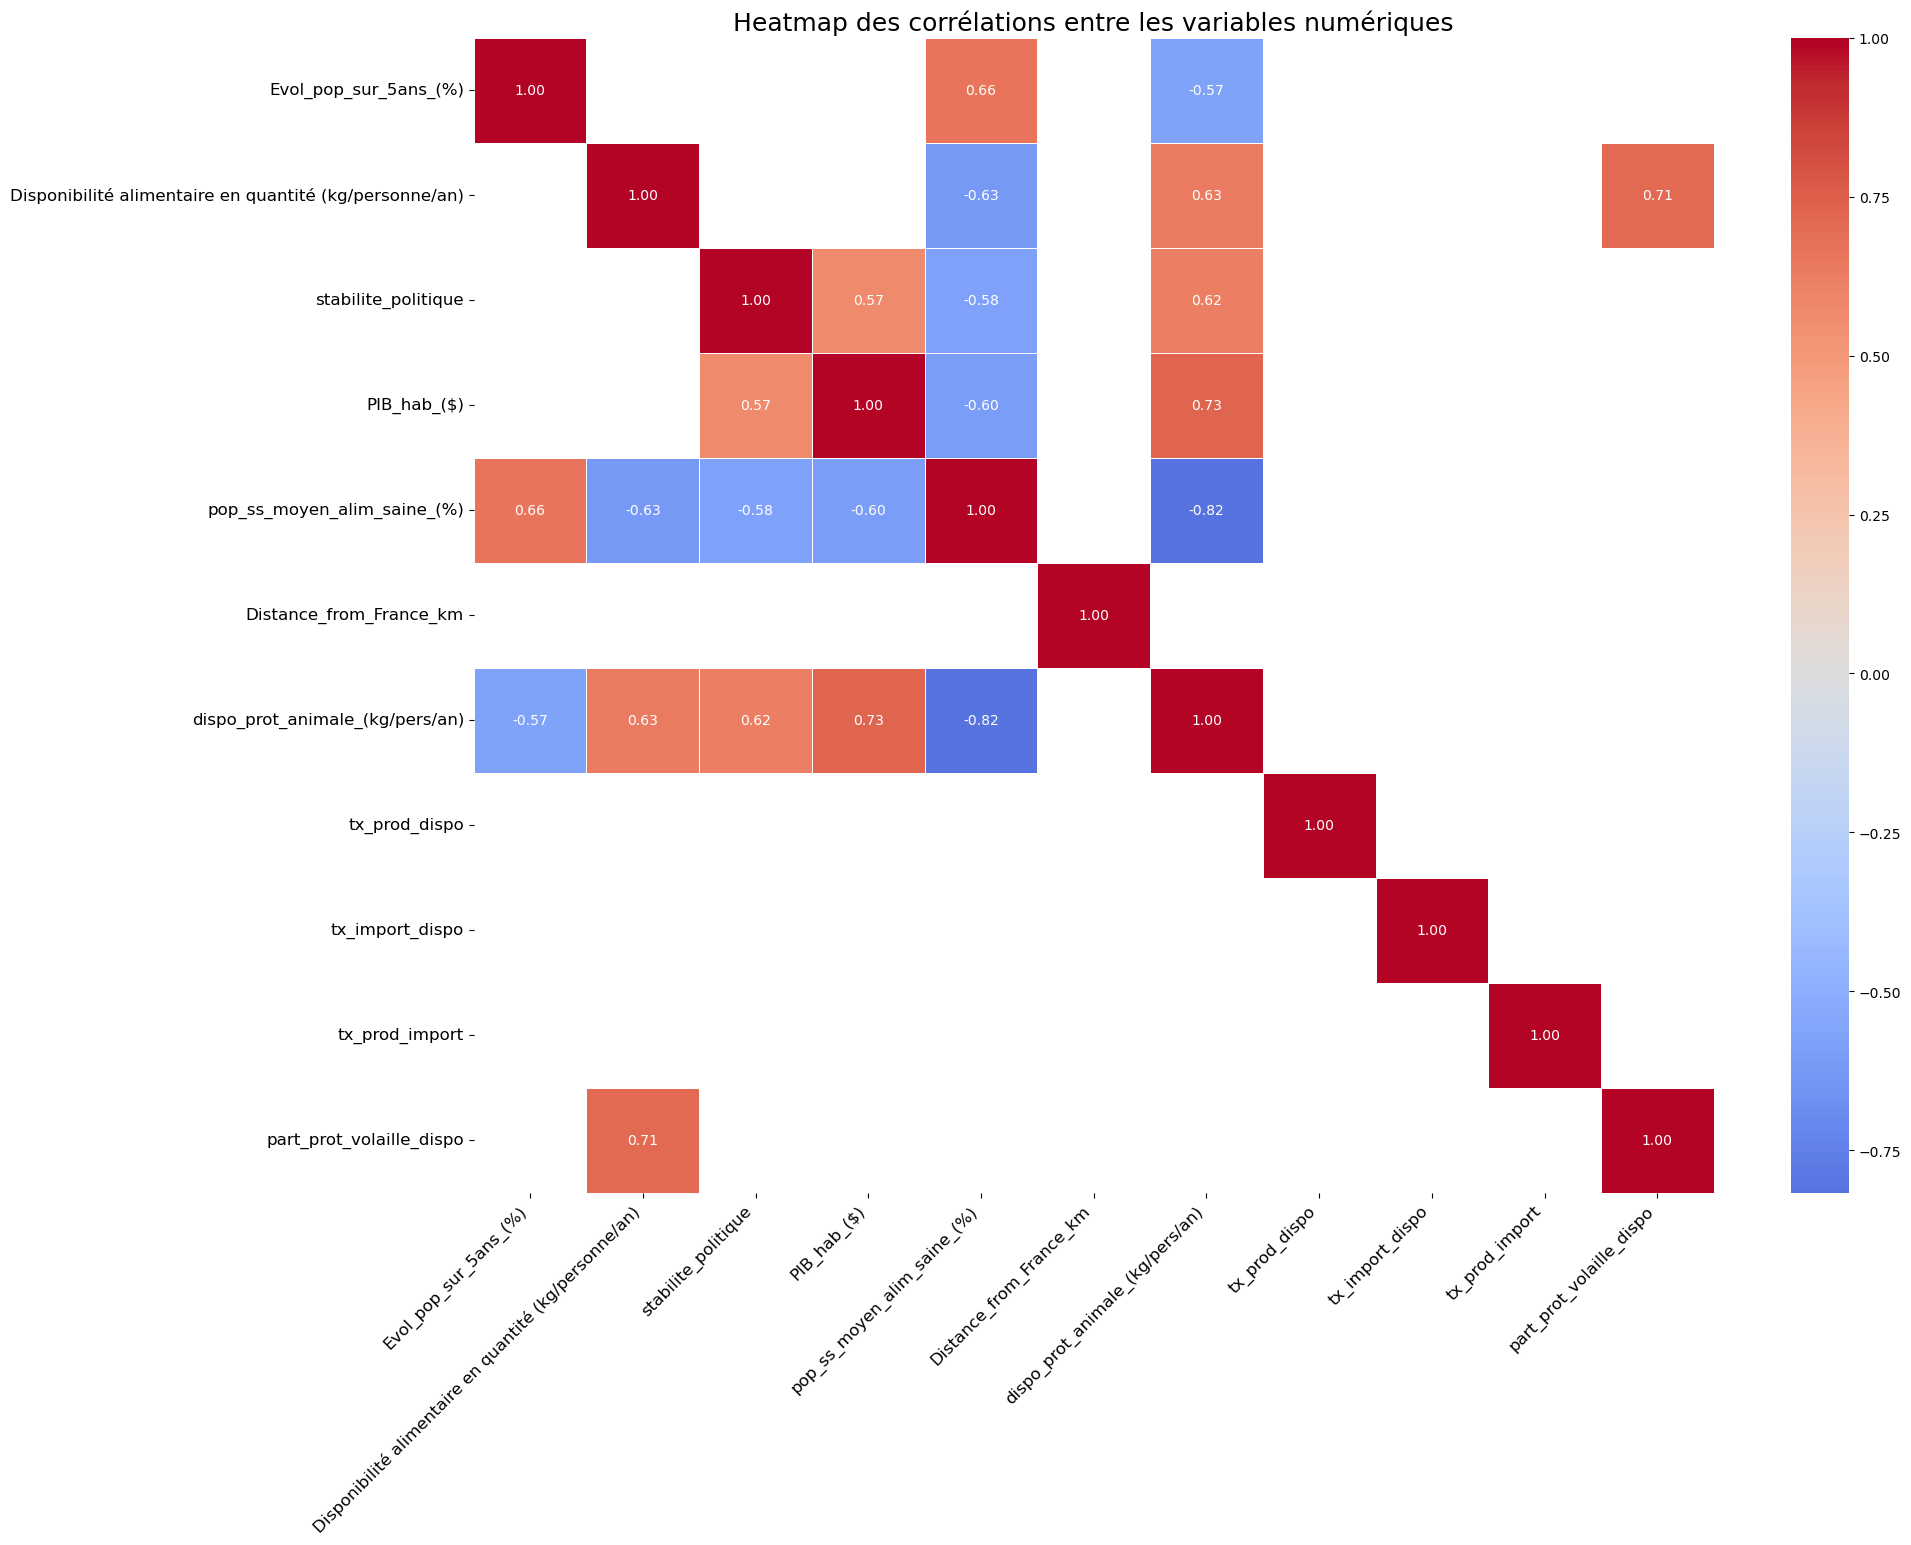

In [117]:
# 1. Analyse Bivariée pour les variables numériques (corrélations et scatter plots)
numeric_columns = df_complet.select_dtypes(include=['float64']).columns
print("\nAnalyse Bivariée pour les variables numériques:")
correlation_matrix = df_complet[numeric_columns].corr()

# Appliquer un masque pour ne conserver que les corrélations supérieures à 0.50 ou inférieures à -0.50
mask = (correlation_matrix > 0.50) | (correlation_matrix < -0.50)

# Ajuster la taille de la figure et la rotation des étiquettes des axes
plt.figure(figsize=(20, 15))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 10}, linewidths=0.5, mask=~mask)

# Rotation des étiquettes des axes
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  

# Ajouter un titre
plt.title('Heatmap des corrélations entre les variables numériques', fontsize=18)

# Afficher la heatmap
plt.show()


## <font>3. Export du dataframe final<a class="anchor" id="2_3"></a></font>

In [118]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 161
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   zone                                                    146 non-null    object 
 1   Evol_pop_sur_5ans_(%)                                   146 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  146 non-null    float64
 3   stabilite_politique                                     146 non-null    float64
 4   PIB_hab_($)                                             146 non-null    float64
 5   pop_ss_moyen_alim_saine_(%)                             146 non-null    float64
 6   Distance_from_France_km                                 146 non-null    float64
 7   dispo_prot_animale_(kg/pers/an)                         146 non-null    float64
 8   tx_prod_dispo                                

In [119]:
# Exporter le DataFrame en CSV
df_complet.to_csv('df_complet_export.csv', index=False, encoding='utf-8')